<a href="https://colab.research.google.com/github/JazminSA/tasd-grupo2-gcs-ml-demo/blob/main/DEMO_TASD_TPC_Grupo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using Google Cloud Storage Data Lake with ML Model**

*Trabajo Práctico Integrador - Tecnologías Aplicadas a Soluciones de Datos* 

*UTN FRBA - 2021 - Grupo 2*

Visualización COVID19 y modelos de predicción de casos confirmados

# 1. Import de librerías necesarias

In [4]:
# all imports
from google.colab import auth


In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Lib needed to read with pandas from cloud storage
!pip install gcsfs

# 2. Acceso a Google Cloud Storage Data Lake bucket


### 2.1 Autenticación Google

In [7]:
#Authenticate using your Google Account
auth.authenticate_user()

#Install the GCloud SDK
!curl https://sdk.cloud.google.com | bash

#Init the SDK
!gcloud init


Se truncaron las últimas líneas 5000 del resultado de transmisión.
google-cloud-sdk/lib/surface/privateca/templates/list.py
google-cloud-sdk/lib/surface/privateca/templates/remove_iam_policy_binding.yaml
google-cloud-sdk/lib/surface/privateca/templates/replicate.py
google-cloud-sdk/lib/surface/privateca/templates/set_iam_policy.yaml
google-cloud-sdk/lib/surface/privateca/templates/update.py
google-cloud-sdk/lib/surface/projects/__init__.py
google-cloud-sdk/lib/surface/projects/add_iam_policy_binding.yaml
google-cloud-sdk/lib/surface/projects/create.py
google-cloud-sdk/lib/surface/projects/delete.py
google-cloud-sdk/lib/surface/projects/describe.py
google-cloud-sdk/lib/surface/projects/get_ancestors.yaml
google-cloud-sdk/lib/surface/projects/get_ancestors_iam_policy.py
google-cloud-sdk/lib/surface/projects/get_iam_policy.py
google-cloud-sdk/lib/surface/projects/get_iam_policy.yaml
google-cloud-sdk/lib/surface/projects/list.py
google-cloud-sdk/lib/surface/projects/move.py
google-cloud-sd

In [8]:
!gcloud auth login

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=SUEoM2bH1ta7UnIWRsPsAZU91d1IIn&prompt=consent&access_type=offline&code_challenge=r8WAGnQJ23TV23Yq5JzRPSJzEfwG8QskfldZObI75UM&code_challenge_method=S256

Enter verification code: 4/1AX4XfWiziKPhUd-oNETjFDMa0M02eMHK45WhY9DiZzDx3mSsoO_qbwMN2Qk

You are now logged in as [jazminacunia@gmail.com].
Your current project is [radiant-arcanum-314517].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID


In [ ]:
!gcloud --help

### 2.2 Descargar archivos de Cloud Storage



In [10]:
#Download files from Cloud Storage
!gsutil cp gs://tasd-grupo2-data-cloud-bucket/covid19/covid19_vacunas_agrupadas.csv ./source_data/covid19_vacunas_agrupadas.csv
!ls source_data

Copying gs://tasd-grupo2-data-cloud-bucket/covid19/covid19_vacunas_agrupadas.csv...
- [1 files][  6.3 KiB/  6.3 KiB]                                                
Operation completed over 1 objects/6.3 KiB.                                      
covid19_vacunas_agrupadas.csv


### 2.3 Subir archivos a Cloud Storage






In [11]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

--2021-07-06 18:37:15--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 709869 (693K) [text/plain]
Saving to: ‘time_series_covid19_confirmed_global.csv’

time_series_covid19 100%[===================>] 693.23K  --.-KB/s    in 0.02s   

2021-07-06 18:37:15 (34.1 MB/s) - ‘time_series_covid19_confirmed_global.csv’ saved [709869/709869]



In [12]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

--2021-07-06 18:37:15--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 492914 (481K) [text/plain]
Saving to: ‘time_series_covid19_deaths_global.csv’

time_series_covid19 100%[===================>] 481.36K  --.-KB/s    in 0.02s   

2021-07-06 18:37:15 (30.4 MB/s) - ‘time_series_covid19_deaths_global.csv’ saved [492914/492914]



In [13]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv

--2021-07-06 18:37:15--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 641553 (627K) [text/plain]
Saving to: ‘time_series_covid19_recovered_global.csv’

time_series_covid19 100%[===================>] 626.52K  --.-KB/s    in 0.02s   

2021-07-06 18:37:15 (33.8 MB/s) - ‘time_series_covid19_recovered_global.csv’ saved [641553/641553]



In [14]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-04-2021.csv

--2021-07-06 18:37:16--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-04-2021.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 555893 (543K) [text/plain]
Saving to: ‘07-04-2021.csv’

07-04-2021.csv      100%[===================>] 542.86K  --.-KB/s    in 0.02s   

2021-07-06 18:37:16 (28.9 MB/s) - ‘07-04-2021.csv’ saved [555893/555893]



In [15]:
#Upload files from Google Colab to Cloud

!gsutil cp time_series_covid19_confirmed_global.csv  gs://tasd-grupo2-data-cloud-bucket/covid19/
!gsutil cp time_series_covid19_deaths_global.csv  gs://tasd-grupo2-data-cloud-bucket/covid19/
!gsutil cp time_series_covid19_recovered_global.csv  gs://tasd-grupo2-data-cloud-bucket/covid19/
!gsutil cp 07-04-2021.csv  gs://tasd-grupo2-data-cloud-bucket/covid19/


Copying file://time_series_covid19_confirmed_global.csv [Content-Type=text/csv]...
-
Operation completed over 1 objects/693.2 KiB.                                    
Copying file://time_series_covid19_deaths_global.csv [Content-Type=text/csv]...
-
Operation completed over 1 objects/481.4 KiB.                                    
Copying file://time_series_covid19_recovered_global.csv [Content-Type=text/csv]...
-
Operation completed over 1 objects/626.5 KiB.                                    
Copying file://07-04-2021.csv [Content-Type=text/csv]...
-
Operation completed over 1 objects/542.9 KiB.                                    


### 2.4 Eliminar archivos de Cloud Storage


In [16]:
!gsutil rm  gs://tasd-grupo2-data-cloud-bucket/TestReviews/delete_reviews_sentiment.csv


Removing gs://tasd-grupo2-data-cloud-bucket/TestReviews/delete_reviews_sentiment.csv...
/ [1 objects]                                                                   
Operation completed over 1 objects.                                              


### 2.5 Leer data desde Cloud Storage

In [17]:
import pandas as pd 

confirmed_df = pd.read_csv('gs://tasd-grupo2-data-cloud-bucket/covid19/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('gs://tasd-grupo2-data-cloud-bucket/covid19/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('gs://tasd-grupo2-data-cloud-bucket/covid19/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('gs://tasd-grupo2-data-cloud-bucket/covid19/07-04-2021.csv')

In [18]:
latest_data.head()

FIPS Admin2 Province_State  ... Combined_Key Incident_Rate  Case_Fatality_Ratio
0   NaN    NaN            NaN  ...  Afghanistan    308.813571             4.127570
1   NaN    NaN            NaN  ...      Albania   4605.427757             1.853095
2   NaN    NaN            NaN  ...      Algeria    322.617184             2.654254
3   NaN    NaN            NaN  ...      Andorra  18013.330745             0.912487
4   NaN    NaN            NaN  ...       Angola    119.362503             2.327301

[5 rows x 14 columns]

#### 2.5.1 Data de últimas fechas en Argentina
Filtro determinadas keys de fechas para mostrar los totales para Argentina

In [19]:
confirmed_df_2 = confirmed_df[['Country/Region', '6/15/21','6/16/21','6/17/21','6/18/21','6/19/21','6/20/21','6/21/21', '6/22/21','6/23/21','6/24/21','6/25/21','6/26/21','6/27/21', '6/28/21','6/29/21', '6/30/21', '7/1/21','7/2/21', '7/3/21','7/4/21']]
confirmed_df_2[confirmed_df_2['Country/Region']=='Argentina']


Country/Region  6/15/21  6/16/21  6/17/21  ...   7/1/21   7/2/21   7/3/21   7/4/21
6      Argentina  4172742  4198620  4222400  ...  4491551  4512439  4526473  4535473

[1 rows x 21 columns]

In [20]:
deaths_df_2 = deaths_df[['Country/Region', '6/15/21','6/16/21','6/17/21','6/18/21','6/19/21','6/20/21','6/21/21', '6/22/21','6/23/21','6/24/21','6/25/21','6/26/21','6/27/21', '6/28/21','6/29/21', '6/30/21', '7/1/21','7/2/21', '7/3/21','7/4/21']]
deaths_df_2[deaths_df_2['Country/Region']=='Argentina']

Country/Region  6/15/21  6/16/21  6/17/21  ...  7/1/21  7/2/21  7/3/21  7/4/21
6      Argentina    86615    87261    87789  ...   94772   95382   95594   95904

[1 rows x 21 columns]

In [21]:
recoveries_df_2 = recoveries_df[['Country/Region', '6/15/21','6/16/21','6/17/21','6/18/21','6/19/21','6/20/21','6/21/21', '6/22/21','6/23/21','6/24/21','6/25/21','6/26/21','6/27/21', '6/28/21','6/29/21', '6/30/21', '7/1/21','7/2/21', '7/3/21','7/4/21']]
recoveries_df_2[recoveries_df_2['Country/Region']=='Argentina']

Country/Region  6/15/21  6/16/21  6/17/21  ...   7/1/21   7/2/21   7/3/21   7/4/21
6      Argentina  3771968  3791979  3818346  ...  4092053  4114096  4136824  4156006

[1 rows x 21 columns]

#3. Visualización de Data COVID19
Consumimos la data con pandas desde el bucket

In [146]:
#confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
#deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
#recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
#latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-04-2021.csv')

import pandas as pd 

confirmed_df = pd.read_csv('gs://tasd-grupo2-data-cloud-bucket/covid19/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('gs://tasd-grupo2-data-cloud-bucket/covid19/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('gs://tasd-grupo2-data-cloud-bucket/covid19/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('gs://tasd-grupo2-data-cloud-bucket/covid19/07-04-2021.csv')

### 3.1 Cantidad de Casos Confirmados, Muertes y Recoveries

#### 3.1.1 Datos y cálculos globales de casos confimed/deaths/recoveries
Casos de estudio: Argentina, Brazil, Chile, Uruguay, Perú

Calculamos además la tasa de mortalidad y recovery para más adelante

In [90]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

argentina_cases = [] 
brazil_cases = []
chile_cases = [] 
uruguay_cases = [] 
peru_cases = [] 

argentina_deaths = [] 
brazil_deaths = []
chile_deaths = [] 
uruguay_deaths = [] 
peru_deaths = [] 

argentina_recoveries = [] 
brazil_recoveries = []
chile_recoveries = [] 
uruguay_recoveries = [] 
peru_recoveries = [] 


for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # casos de estudio
    argentina_cases.append(confirmed_df[confirmed_df['Country/Region']=='Argentina'][i].sum())
    brazil_cases.append(confirmed_df[confirmed_df['Country/Region']=='Brazil'][i].sum())
    chile_cases.append(confirmed_df[confirmed_df['Country/Region']=='Chile'][i].sum())
    uruguay_cases.append(confirmed_df[confirmed_df['Country/Region']=='Uruguay'][i].sum())    
    peru_cases.append(confirmed_df[confirmed_df['Country/Region']=='Peru'][i].sum())

    argentina_deaths.append(deaths_df[deaths_df['Country/Region']=='Argentina'][i].sum())
    brazil_deaths.append(deaths_df[deaths_df['Country/Region']=='Brazil'][i].sum())
    chile_deaths.append(deaths_df[deaths_df['Country/Region']=='Chile'][i].sum())
    uruguay_deaths.append(deaths_df[deaths_df['Country/Region']=='Uruguay'][i].sum())    
    peru_deaths.append(deaths_df[deaths_df['Country/Region']=='Peru'][i].sum())

    argentina_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Argentina'][i].sum())
    brazil_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Brazil'][i].sum())
    chile_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Chile'][i].sum())
    uruguay_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Uruguay'][i].sum())    
    peru_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Peru'][i].sum())

#### 3.1.2 Definimos funciones de incremento diario y promedios

Y calculamos totales de cada uno de los parámetros (confirmed/deaths/recoveries), globales y para los países en **estudio**

In [91]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)

#recoveries 
world_daily_recovery = daily_increase(total_recovered)
world_recovery_avg = moving_average(total_recovered, window)
world_daily_recovery_avg = moving_average(world_daily_recovery, window)

# Casos de estudio

# confirmed cases
argentina_daily_increase = daily_increase(argentina_cases)
brazil_daily_increase = daily_increase(brazil_cases)
chile_daily_increase = daily_increase(chile_cases)
uruguay_daily_increase = daily_increase(uruguay_cases)
peru_daily_increase = daily_increase(peru_cases)

# deaths
argentina_daily_death = daily_increase(argentina_deaths)
brazil_daily_death = daily_increase(brazil_deaths)
chile_daily_death = daily_increase(chile_deaths)
uruguay_daily_death = daily_increase(uruguay_deaths)
peru_daily_death = daily_increase(peru_deaths)

# deaths
argentina_daily_recovery = daily_increase(argentina_recoveries)
brazil_daily_recovery = daily_increase(brazil_recoveries)
chile_daily_recovery = daily_increase(chile_recoveries)
uruguay_daily_recovery = daily_increase(uruguay_recoveries)
peru_daily_recovery = daily_increase(peru_recoveries)

#### 3.1.3 Visualizamos los datos desde el inicio de los registros (22/1/2020)


In [92]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

adjusted_dates = adjusted_dates.reshape(1, -1)[0]

##### 3.1.3.a Casos de Coronavirus en el tiempo

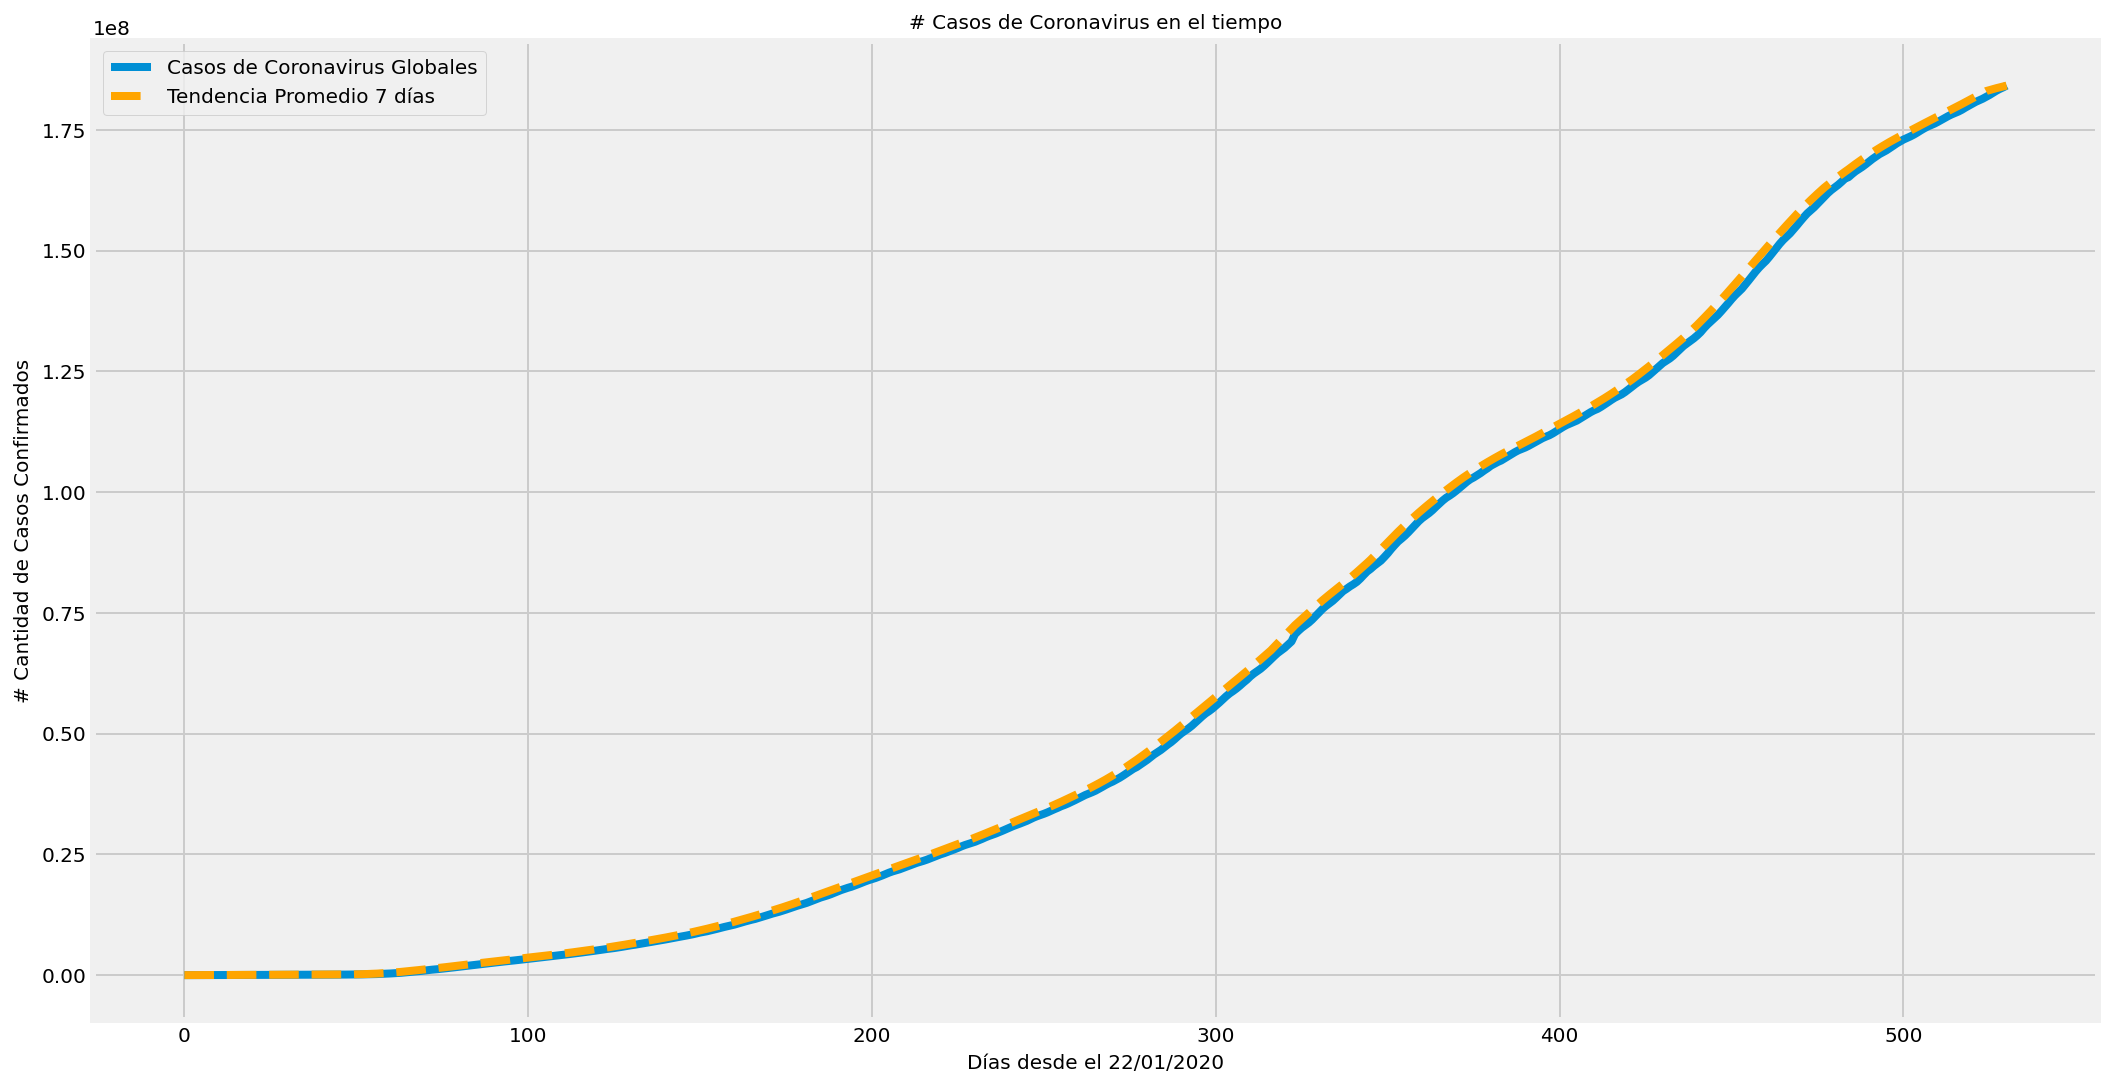

In [93]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('# Casos de Coronavirus en el tiempo', size=10)
plt.xlabel('Días desde el 22/01/2020', size=10)
plt.ylabel('# Cantidad de Casos Confirmados', size=10)
plt.legend(['Casos de Coronavirus Globales', 'Tendencia Promedio {} días'.format(window)], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

##### 3.1.3.b Muertes de Coronavirus en el tiempo

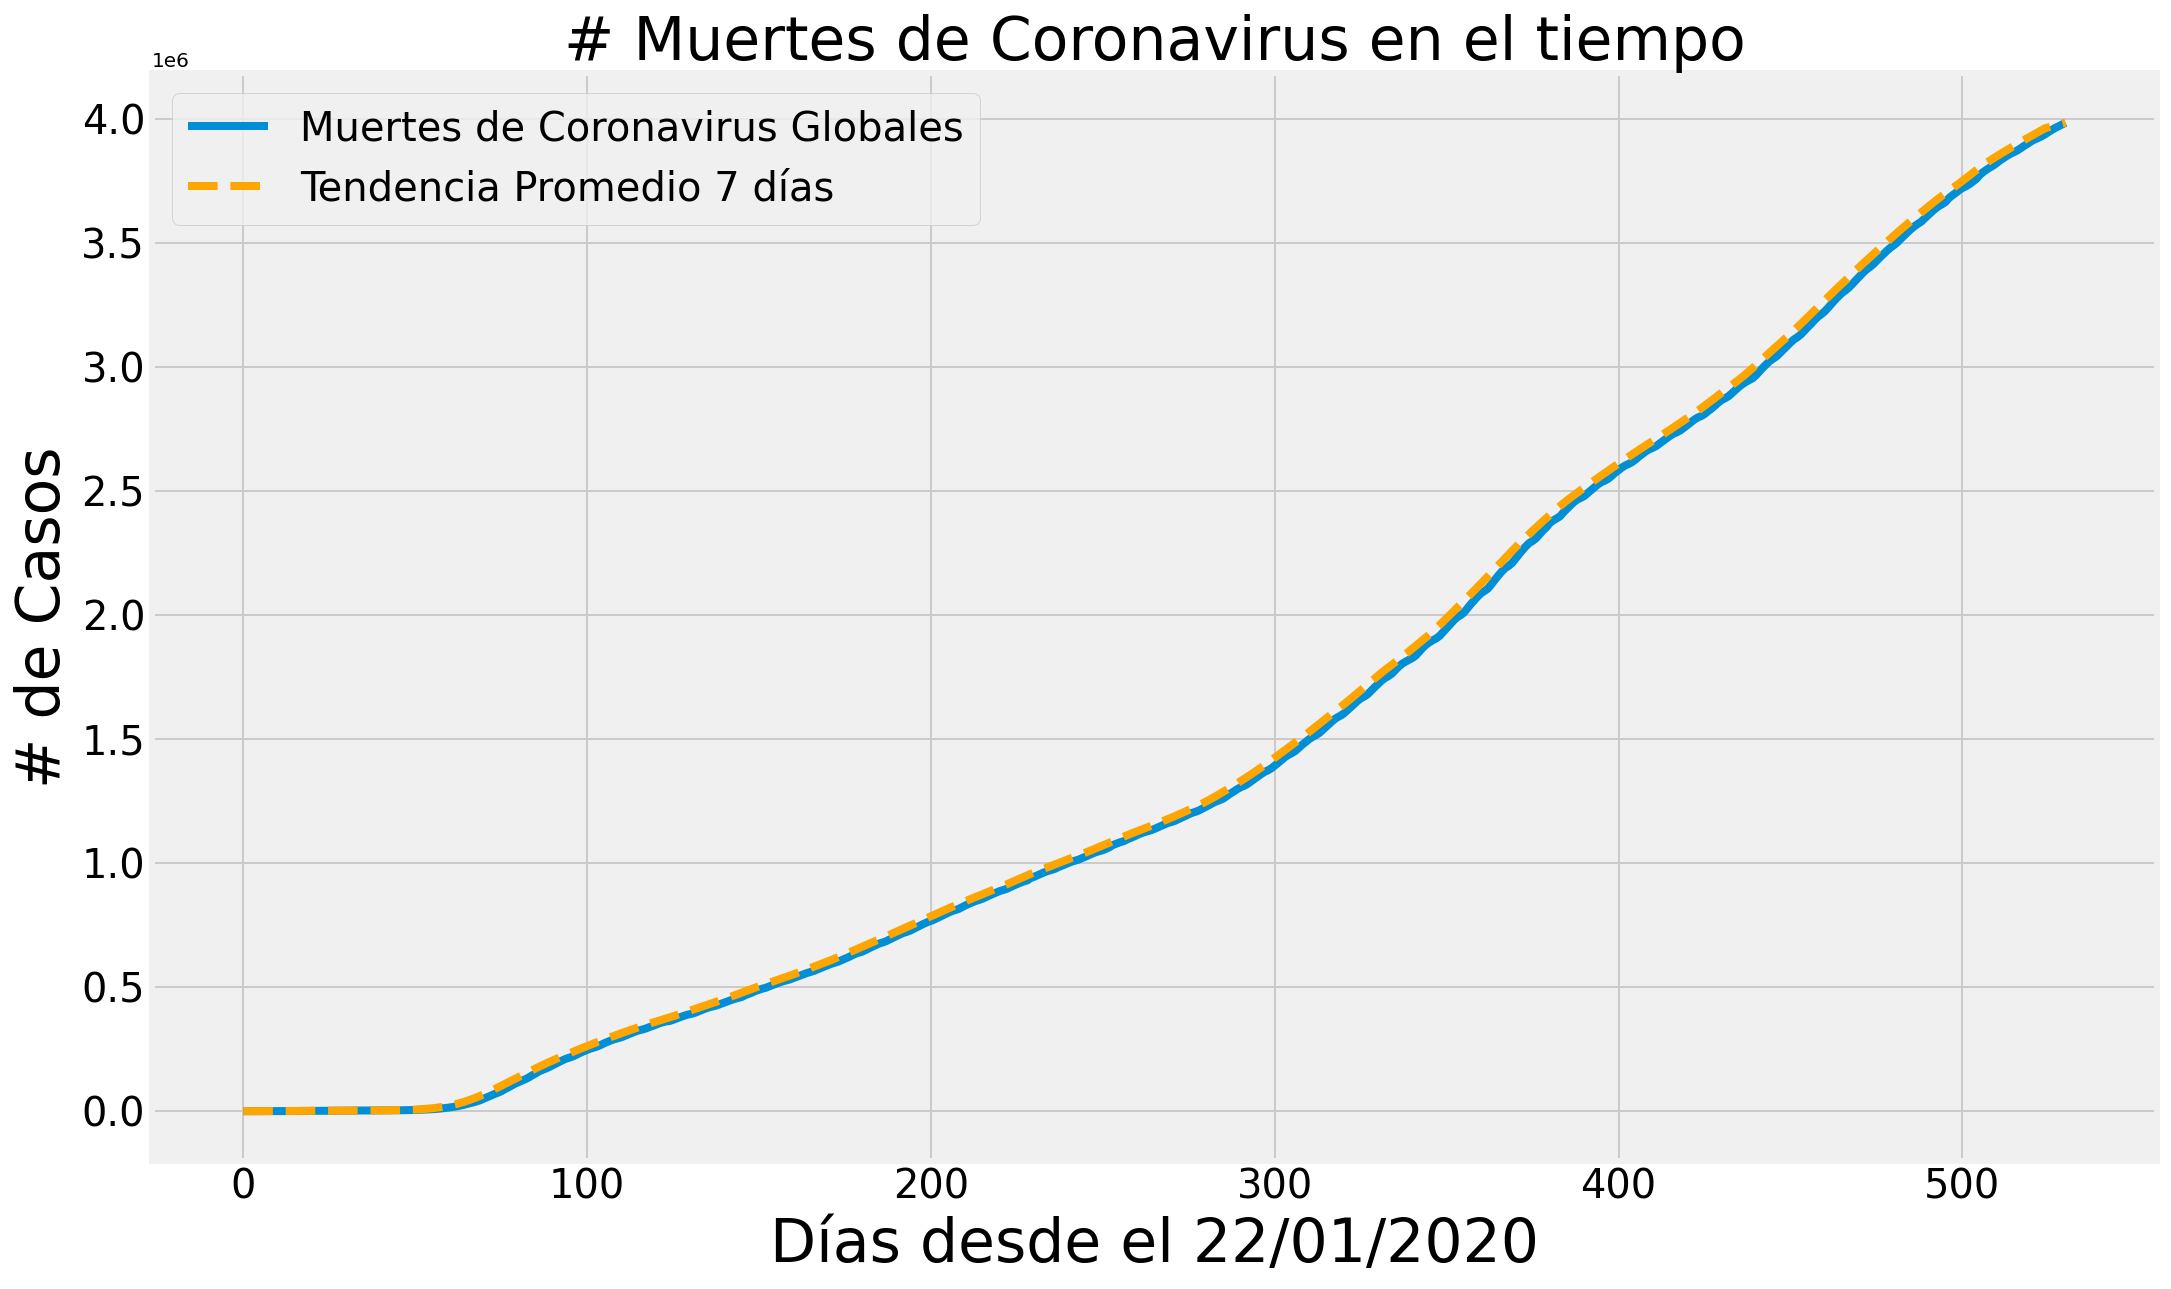

In [94]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, world_death_avg, linestyle='dashed', color='orange')
plt.title('# Muertes de Coronavirus en el tiempo', size=30)
plt.xlabel('Días desde el 22/01/2020', size=30)
plt.ylabel('# de Casos', size=30)
plt.legend(['Muertes de Coronavirus Globales', 'Tendencia Promedio {} días'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

##### 3.1.3.c Recoveries de Coronavirus en el tiempo

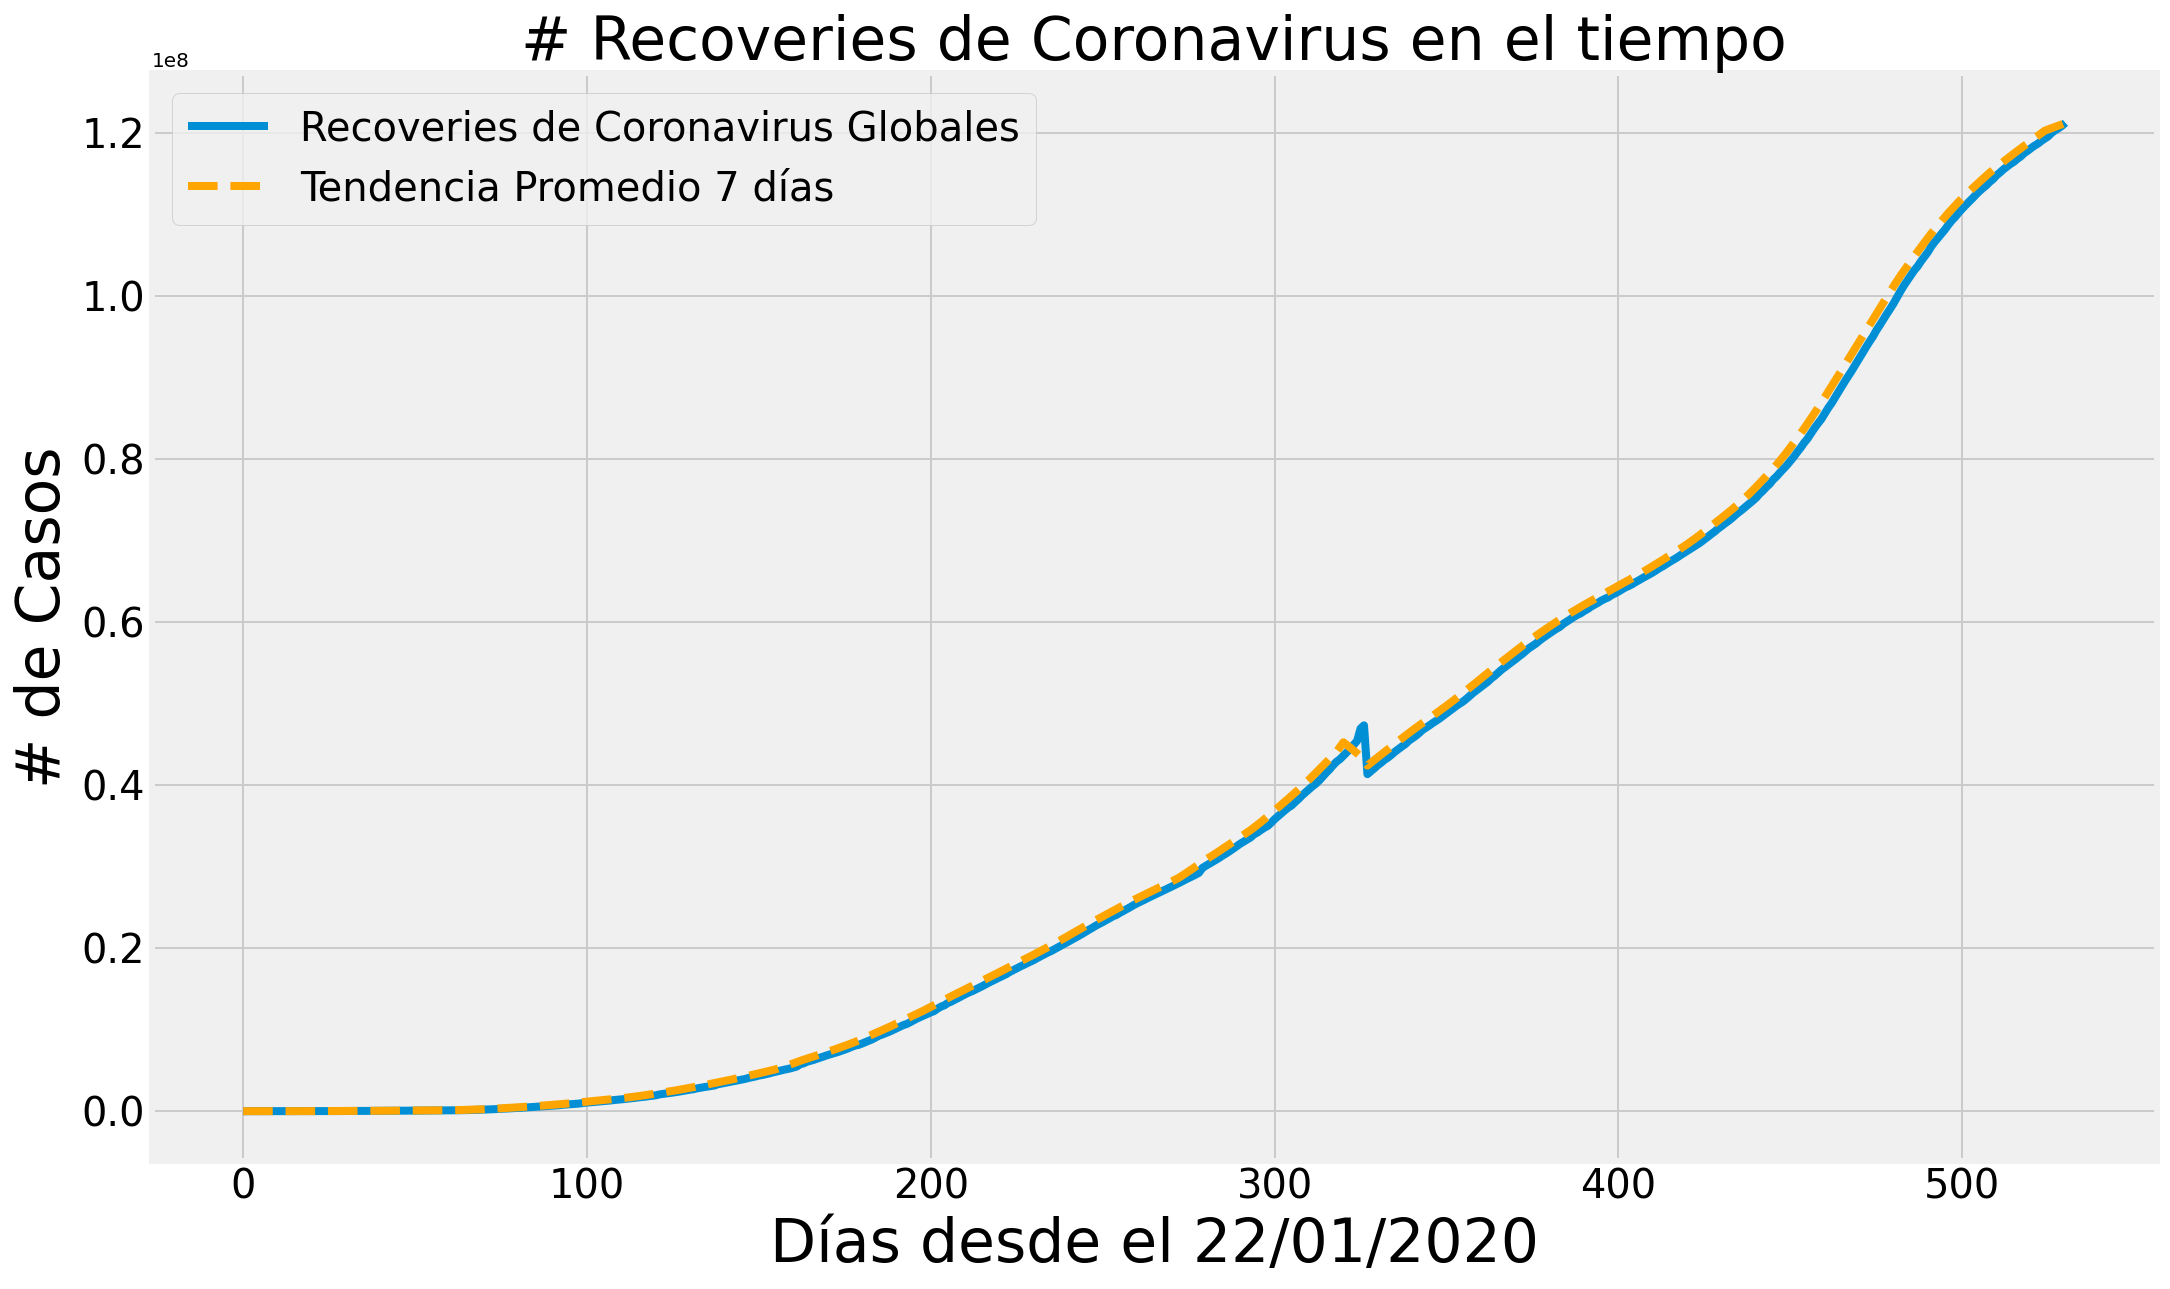

In [95]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_recovered)
plt.plot(adjusted_dates, world_recovery_avg, linestyle='dashed', color='orange')
plt.title('# Recoveries de Coronavirus en el tiempo', size=30)
plt.xlabel('Días desde el 22/01/2020', size=30)
plt.ylabel('# de Casos', size=30)
plt.legend(['Recoveries de Coronavirus Globales', 'Tendencia Promedio {} días'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

##### 3.1.3.d Casos Activos de Coronavirus en el tiempo

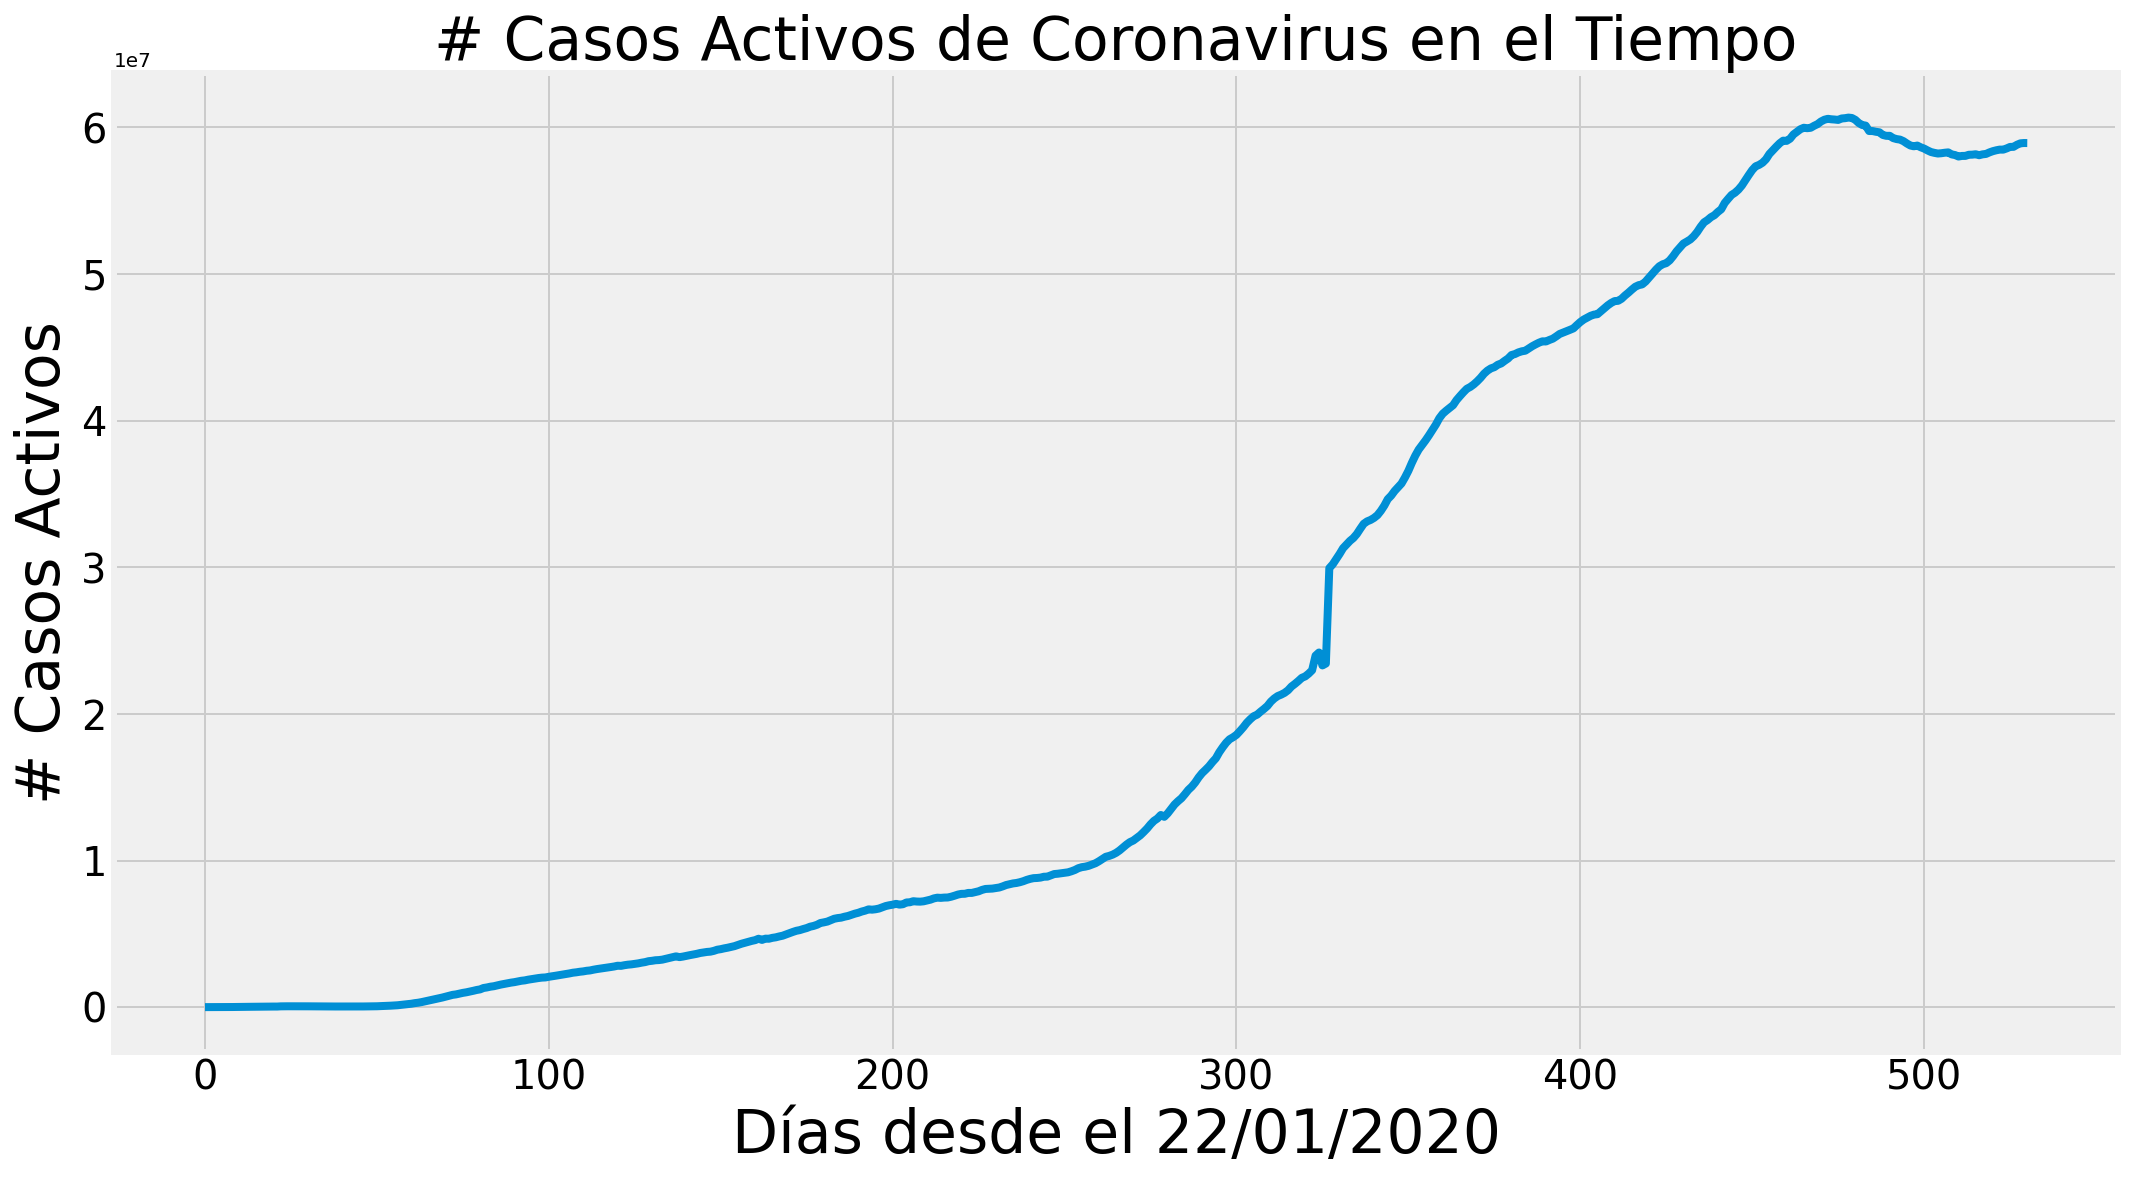

In [96]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_active)
plt.title('# Casos Activos de Coronavirus en el Tiempo', size=30)
plt.xlabel('Días desde el 22/01/2020', size=30)
plt.ylabel('# Casos Activos', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### 3.2 Incremento diario

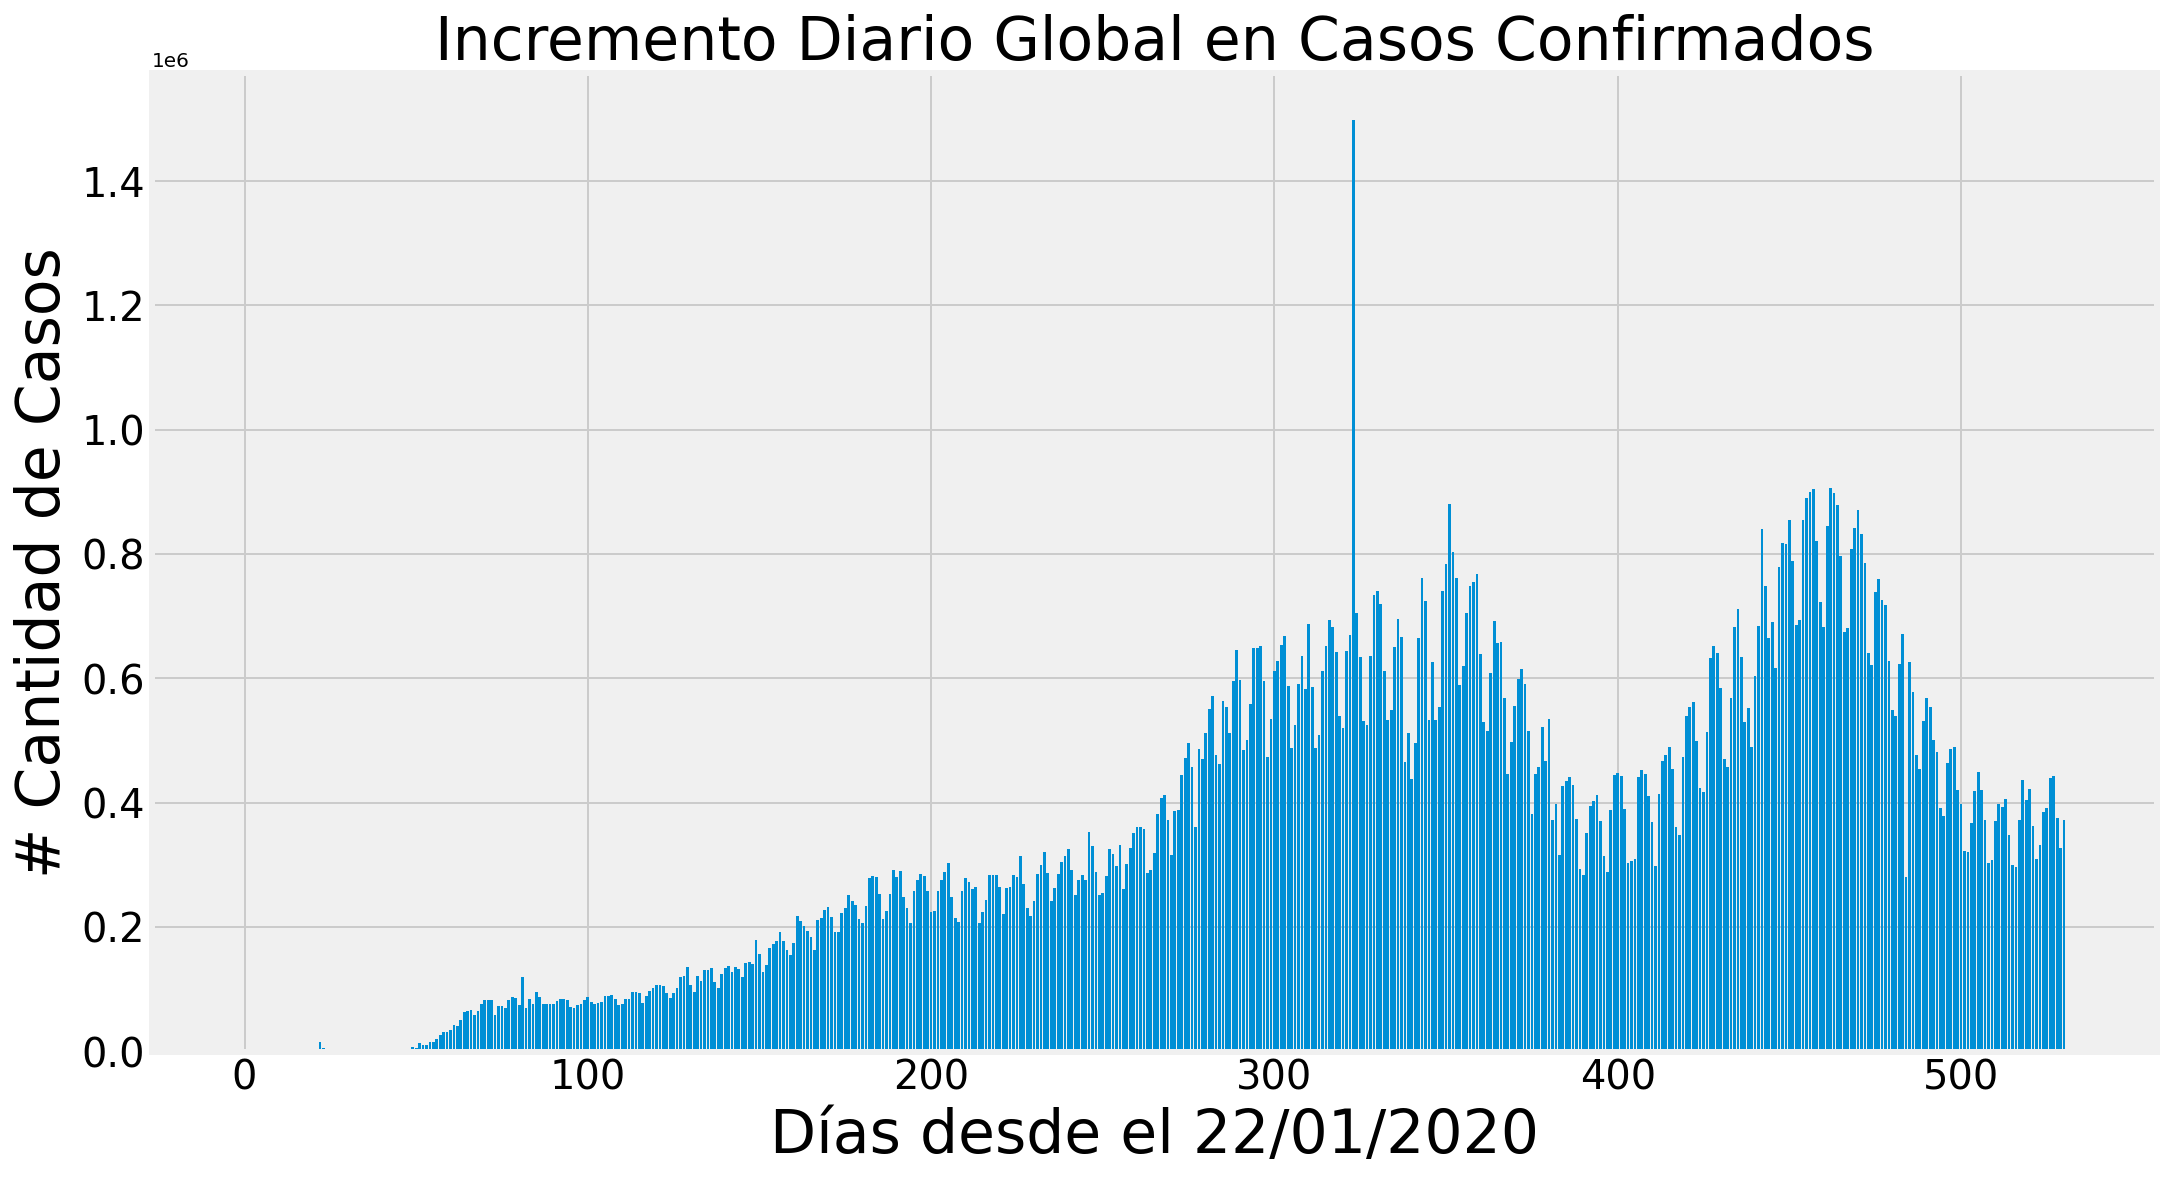

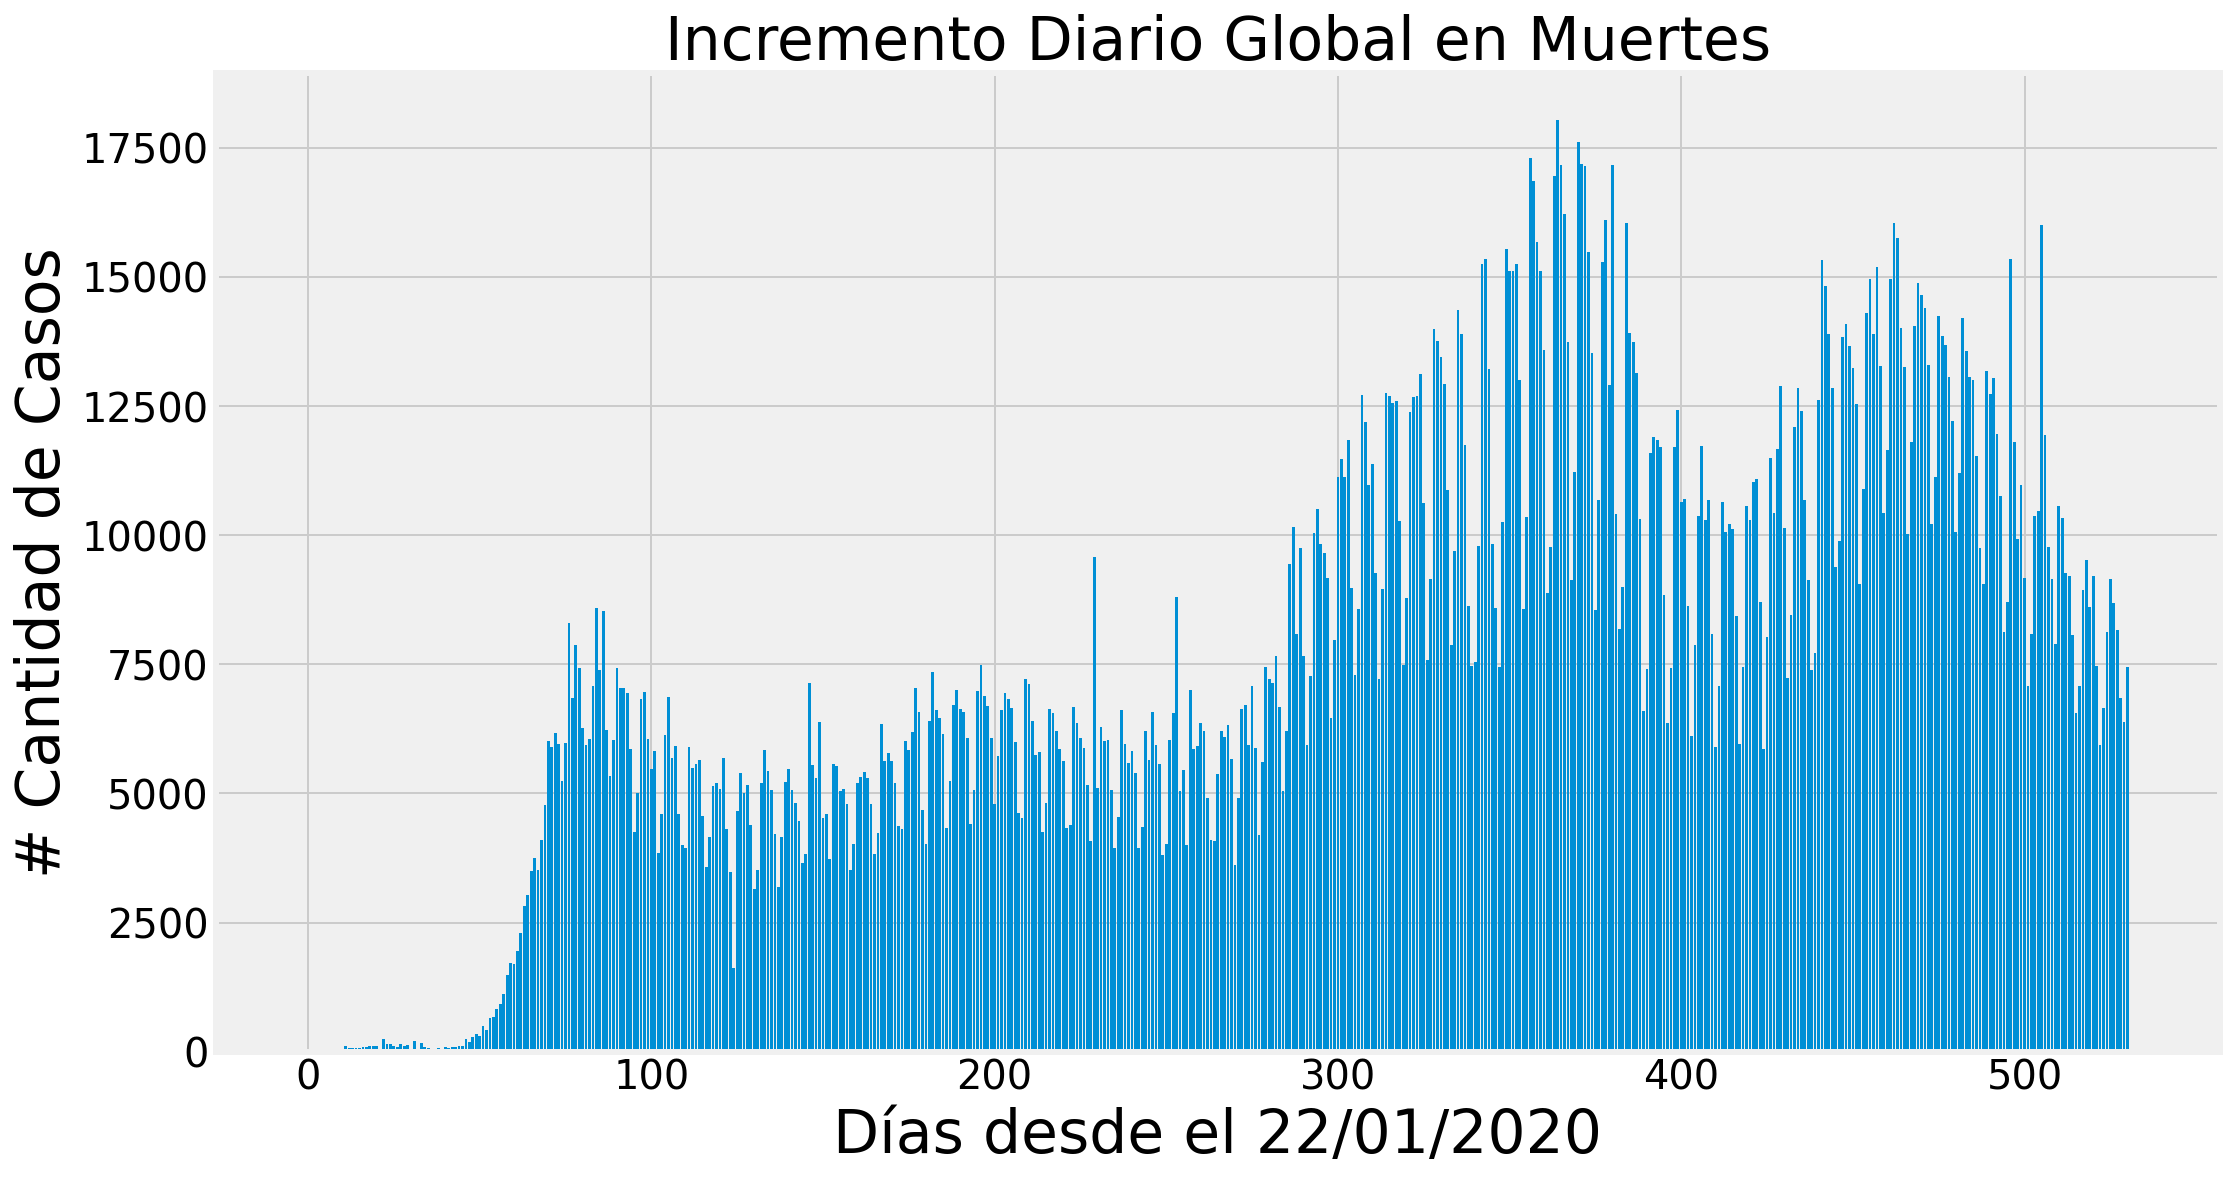

In [97]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('Incremento Diario Global en Casos Confirmados', size=30)
plt.xlabel('Días desde el 22/01/2020', size=30)
plt.ylabel('# Cantidad de Casos', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_death)
plt.title('Incremento Diario Global en Muertes', size=30)
plt.xlabel('Días desde el 22/01/2020', size=30)
plt.ylabel('# Cantidad de Casos', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

#plt.figure(figsize=(16, 9))
#plt.bar(adjusted_dates, world_daily_recovery)
#plt.title('Incremento Diario Global en Recoveries', size=30)
#plt.ylabel('# Cantidad de Casos', size=30)
#plt.xlabel('Días desde el 22/01/2020', size=30)
#plt.xticks(size=20)
#plt.yticks(size=20)
#plt.show()

### 3.3 Gráficos por País

#### 3.3.0 Defino función para graficar

In [98]:
def country_plot(x, y1, y2, y3, y4, country):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y1)
    plt.title('{} Casos Confirmados'.format(country), size=30)
    plt.xlabel('Días desde 22/01/2020', size=30)
    plt.ylabel('# Cantidad de casos', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y2)
    plt.title('{} Incremento Diario en Casos Confirmados'.format(country), size=30)
    plt.xlabel('Días desde 22/01/2020', size=30)
    plt.ylabel('# Cantidad de casos', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y3)
    plt.title('{} Incremento Diario en Muertes'.format(country), size=30)
    plt.xlabel('Días desde 22/01/2020', size=30)
    plt.ylabel('# Cantidad de casos', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y4)
    plt.title('{} Incremento Diario en Recoveries'.format(country), size=30)
    plt.xlabel('Días desde 22/01/2020', size=30)
    plt.ylabel('# Cantidad de casos', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

#### 3.3.1 Gráficos para Argentina

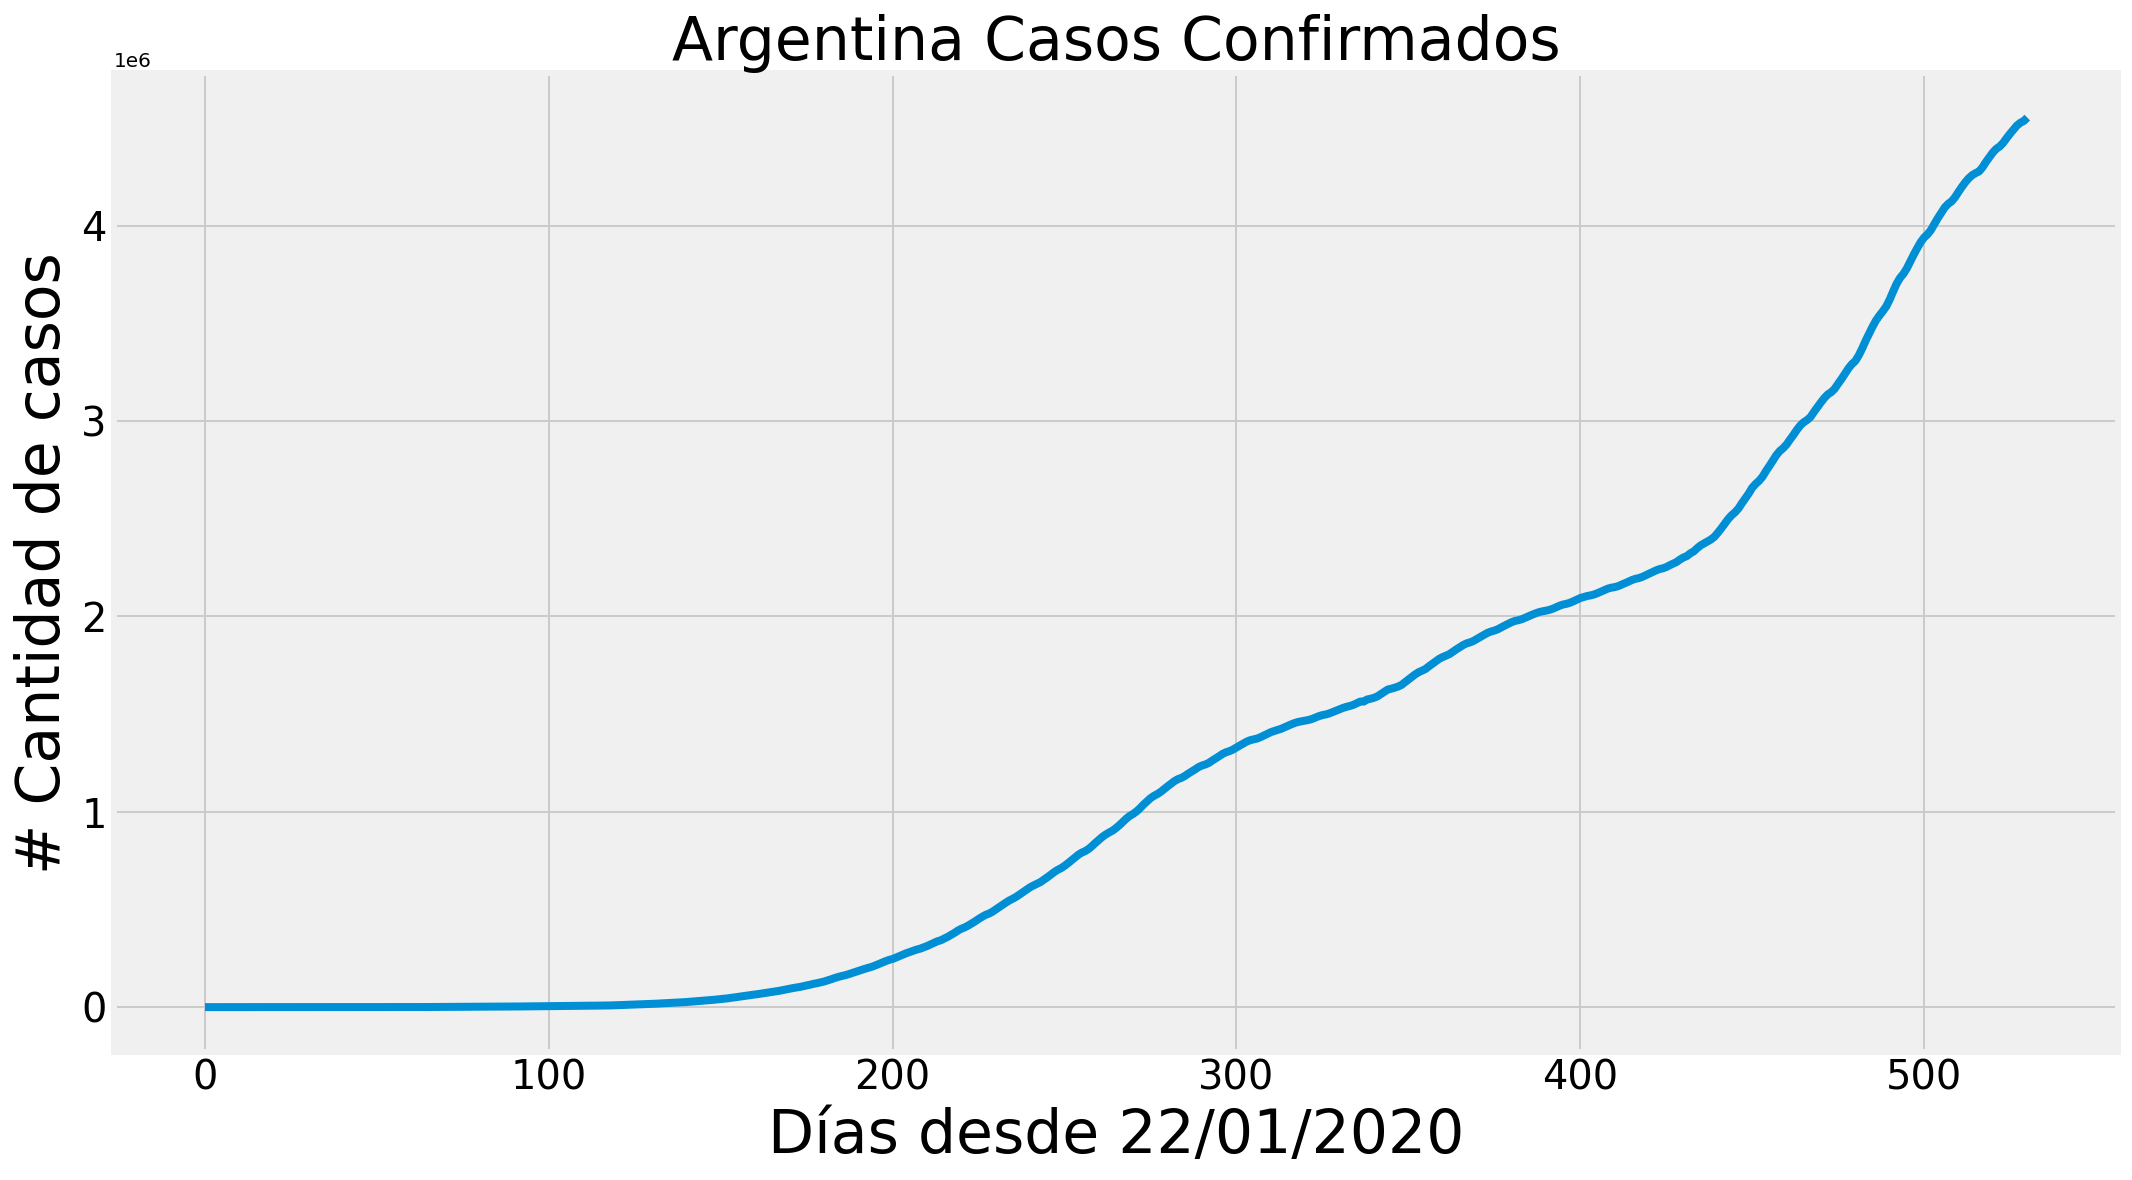

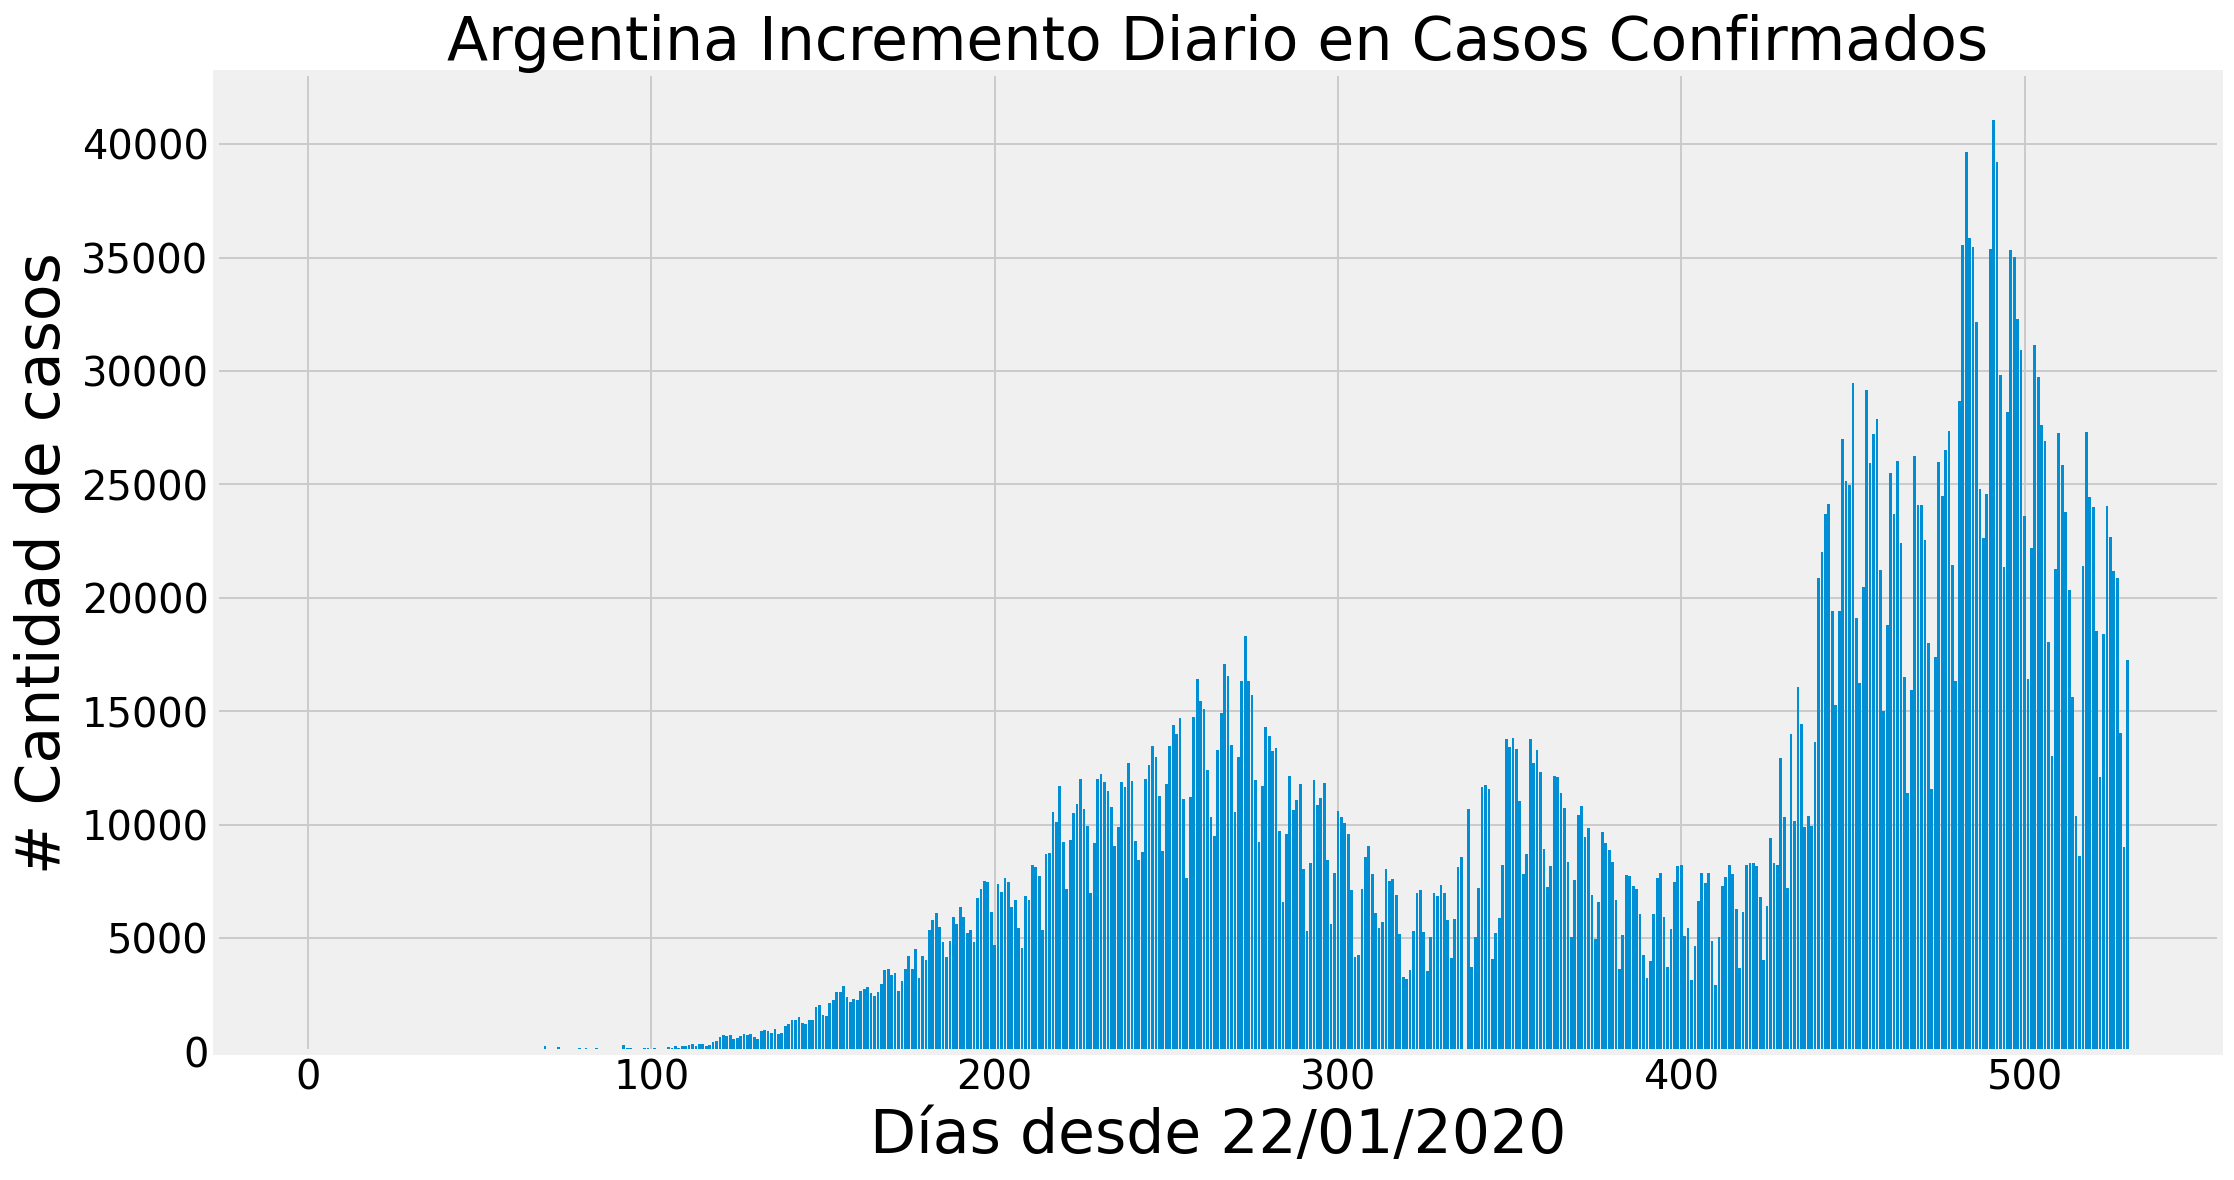

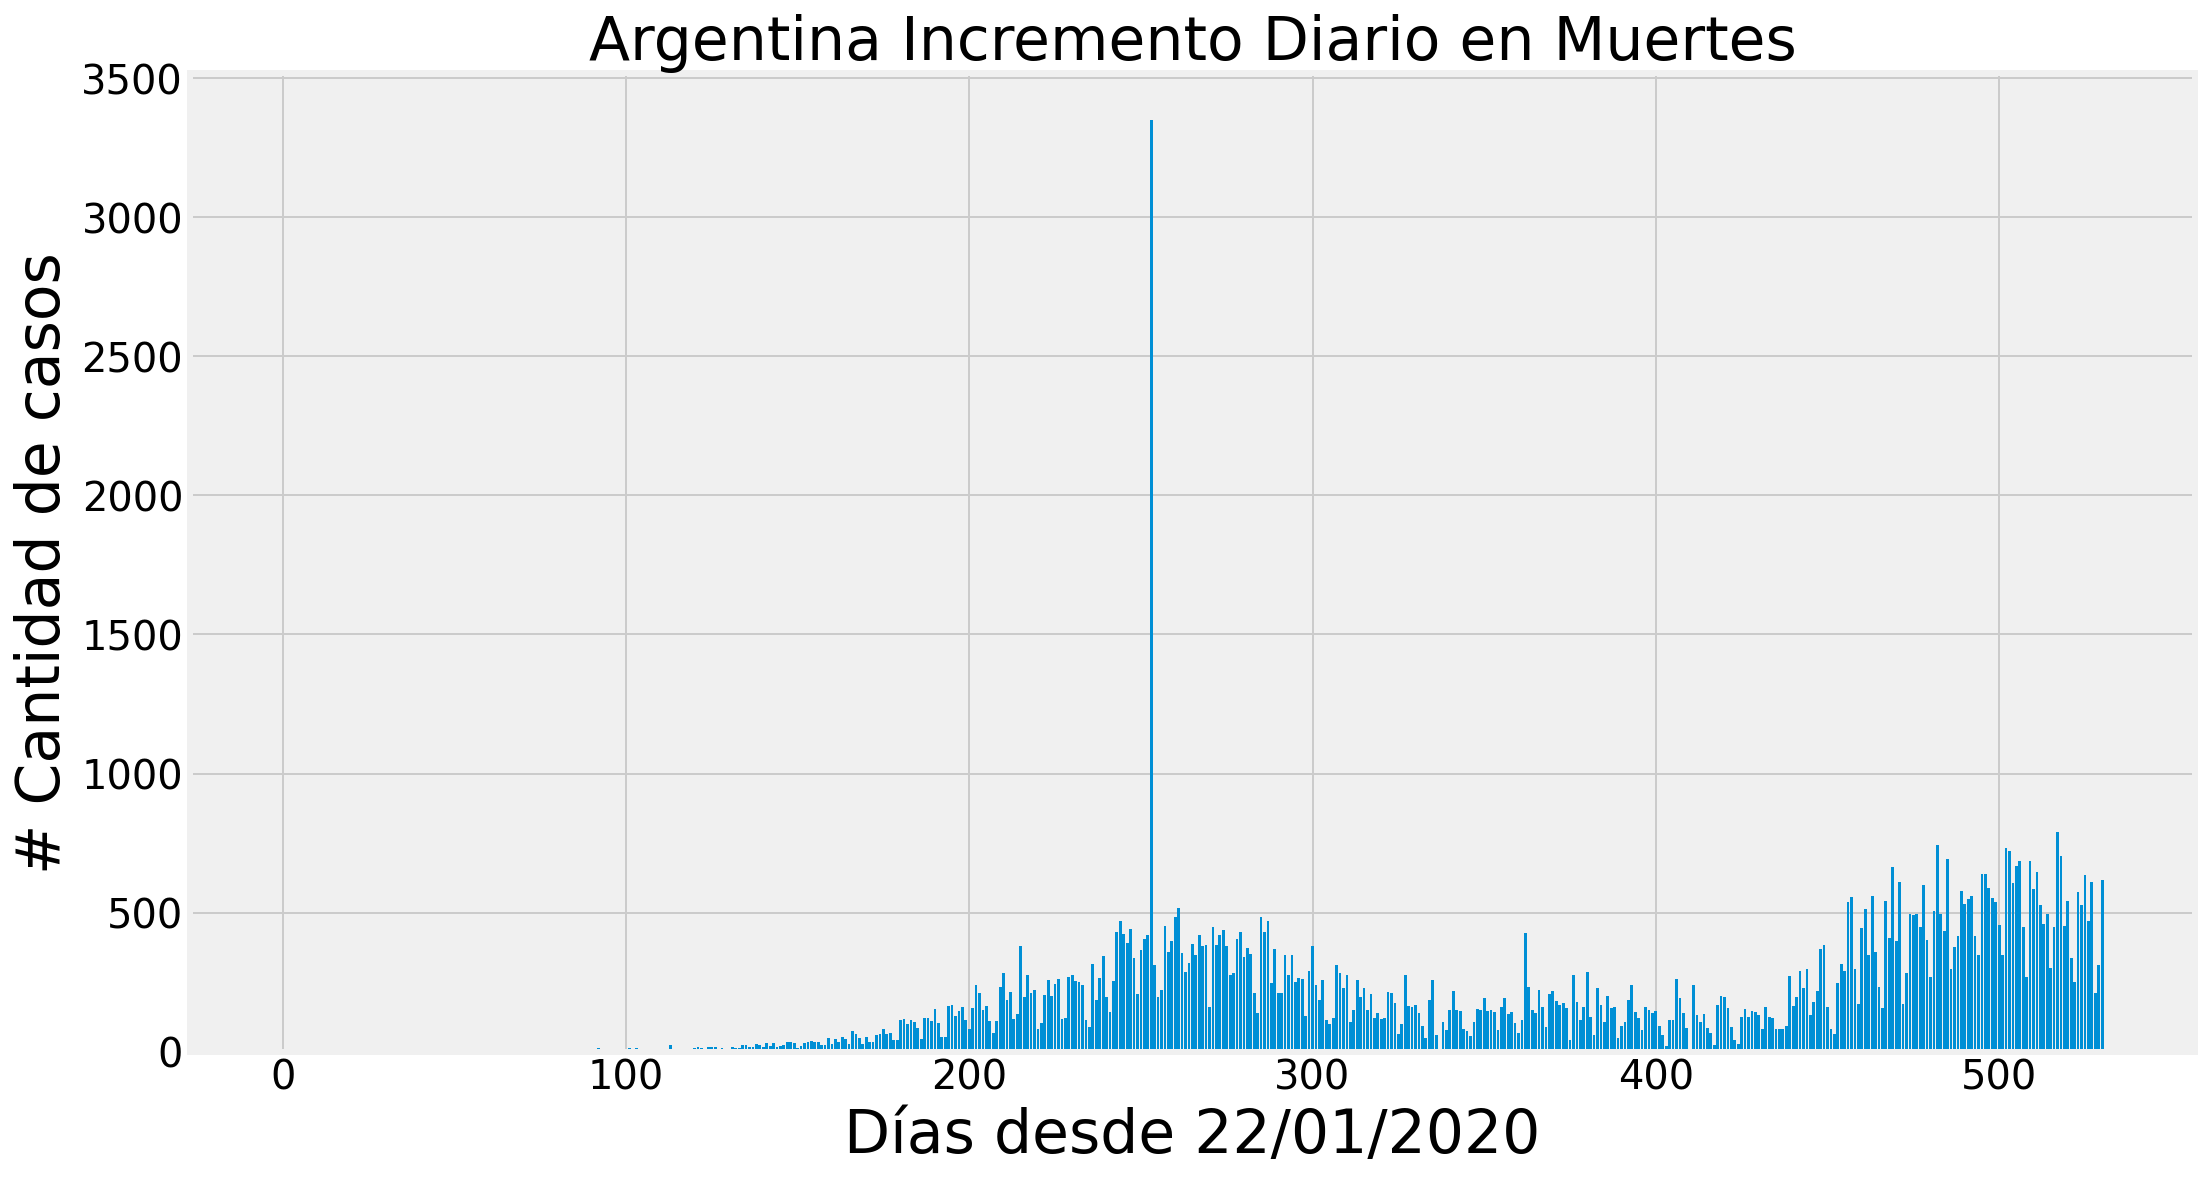

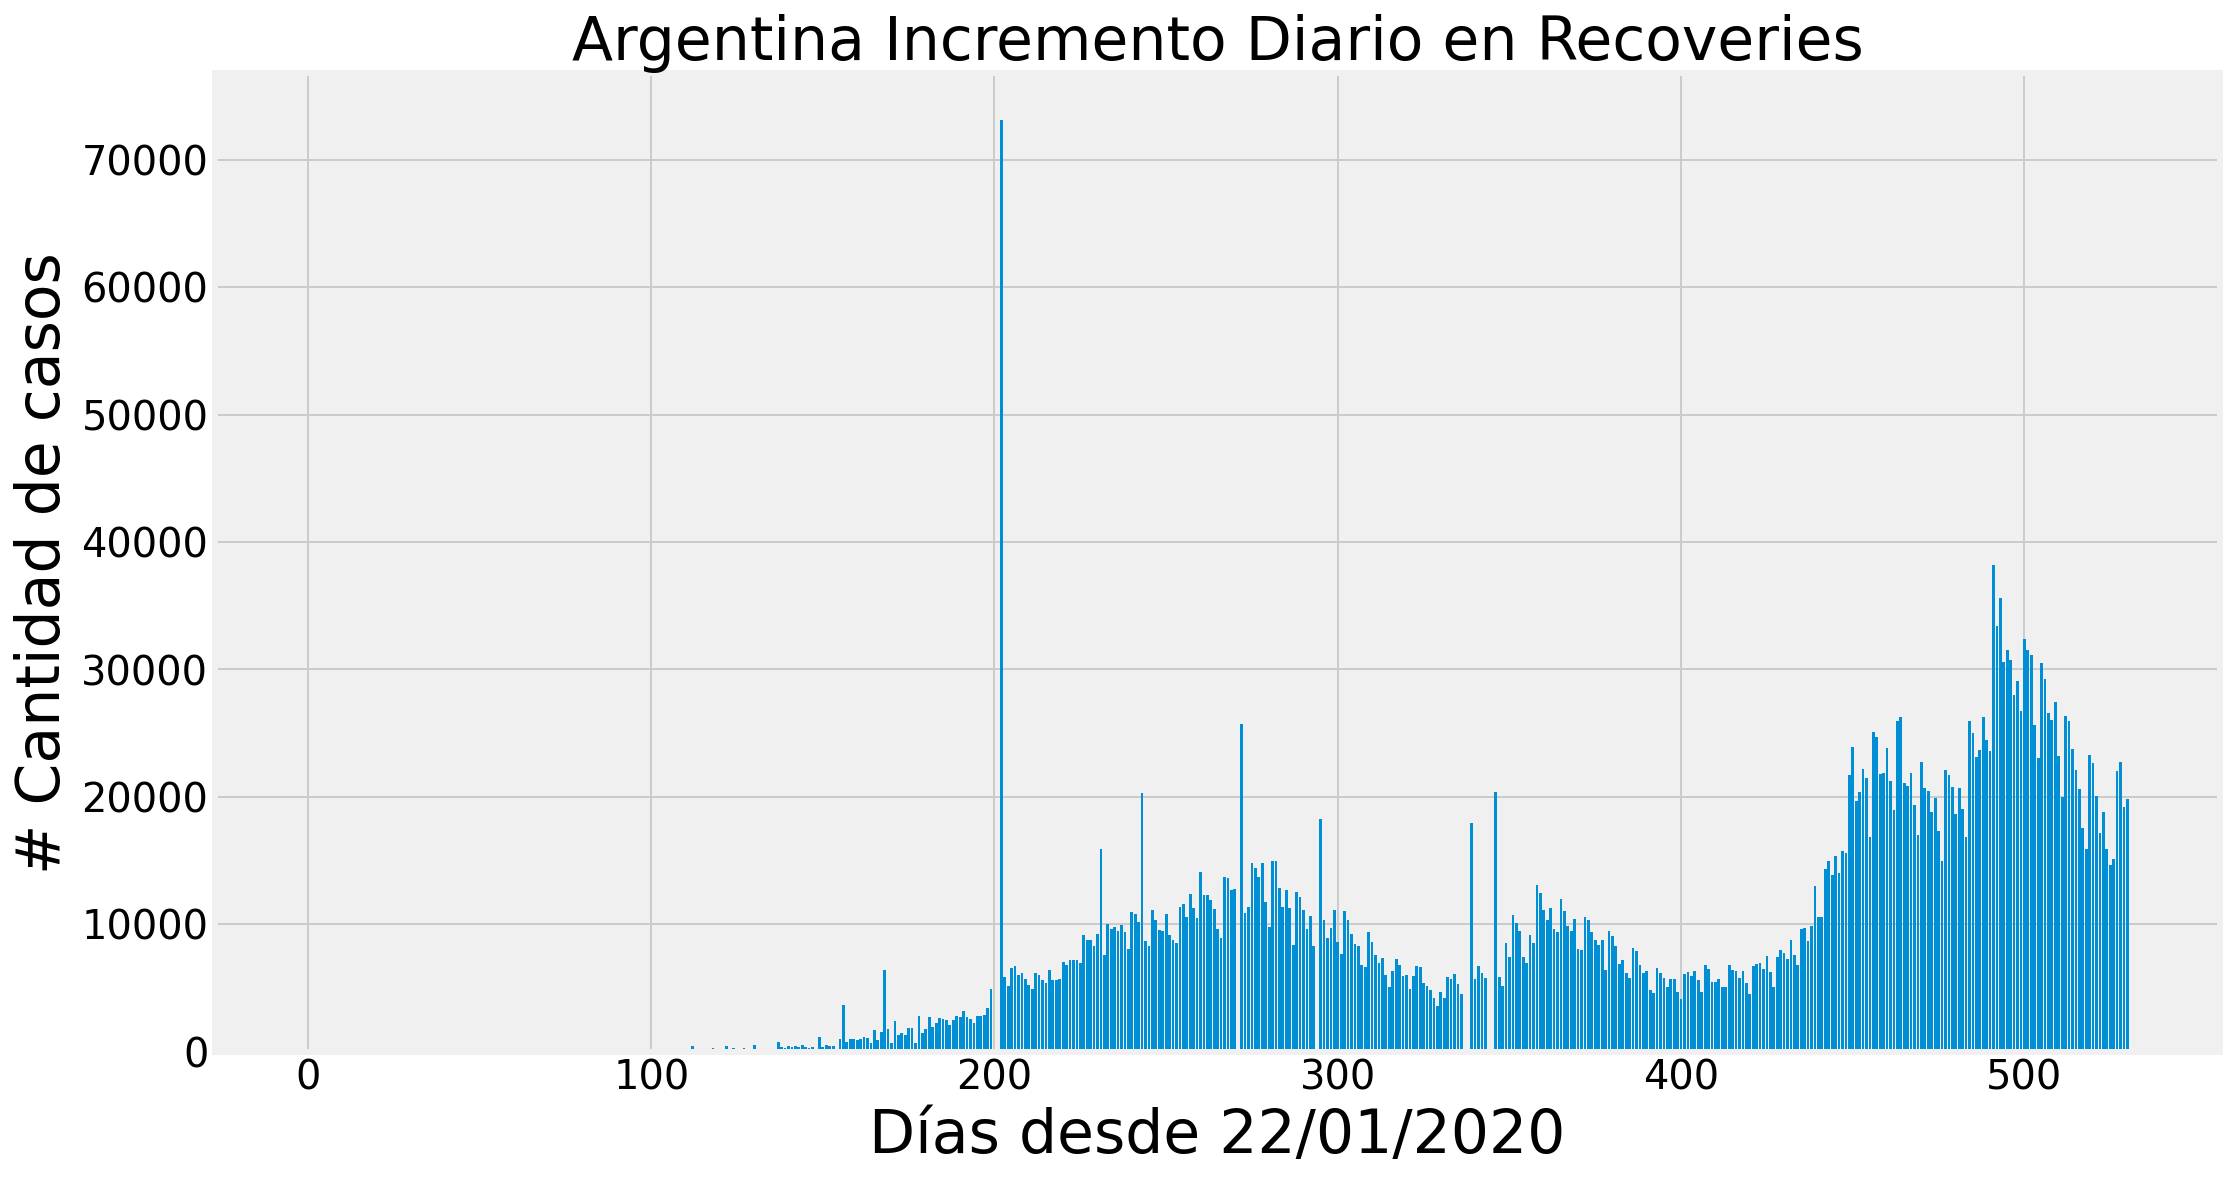

In [99]:
country_plot(adjusted_dates, argentina_cases, argentina_daily_increase, argentina_daily_death, argentina_daily_recovery, 'Argentina')


#### 3.3.2 Gráficos para Brazil

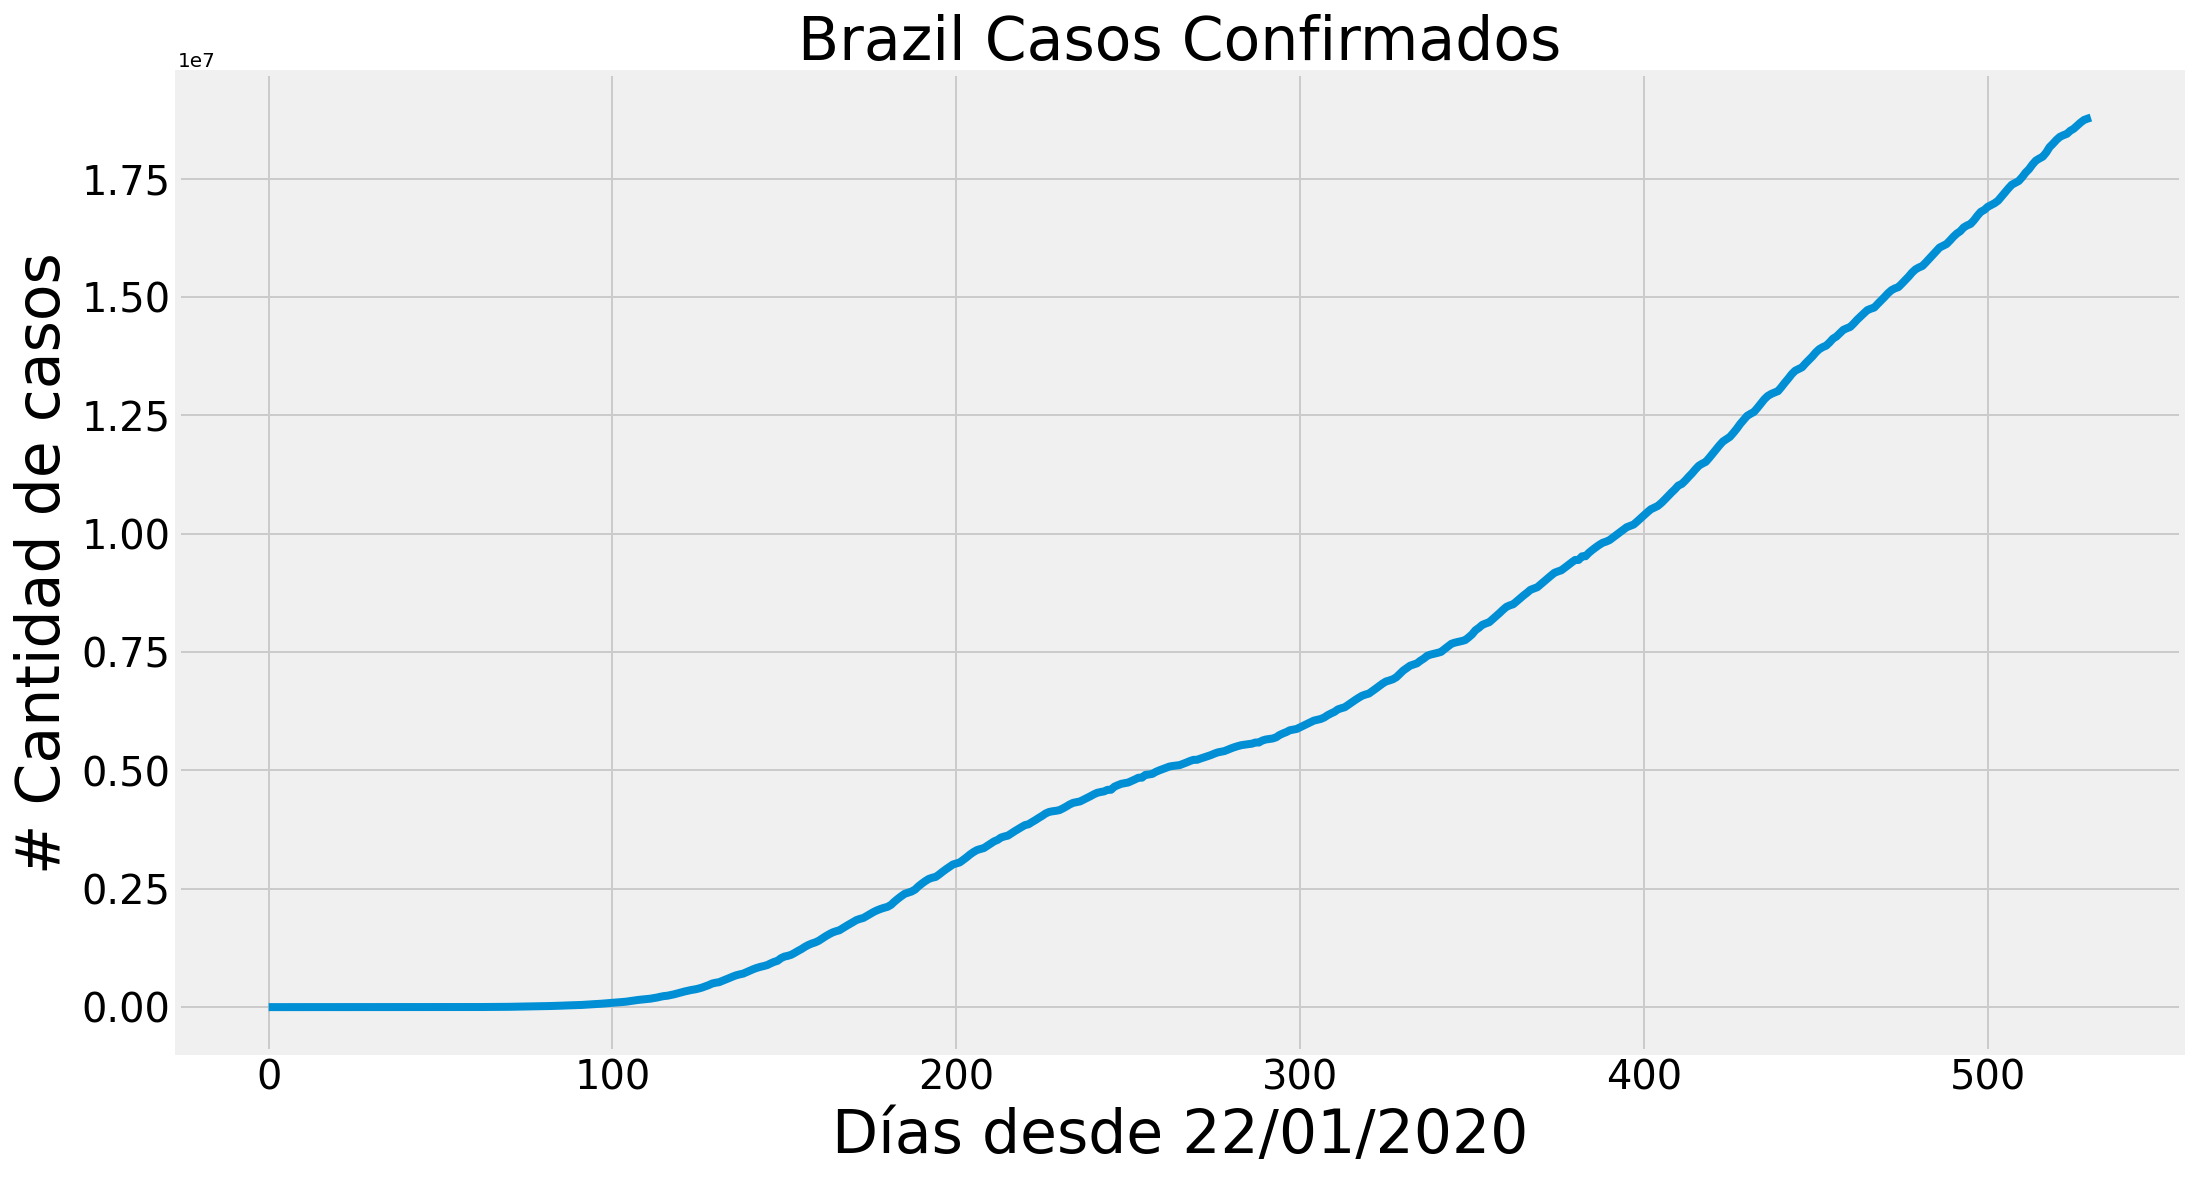

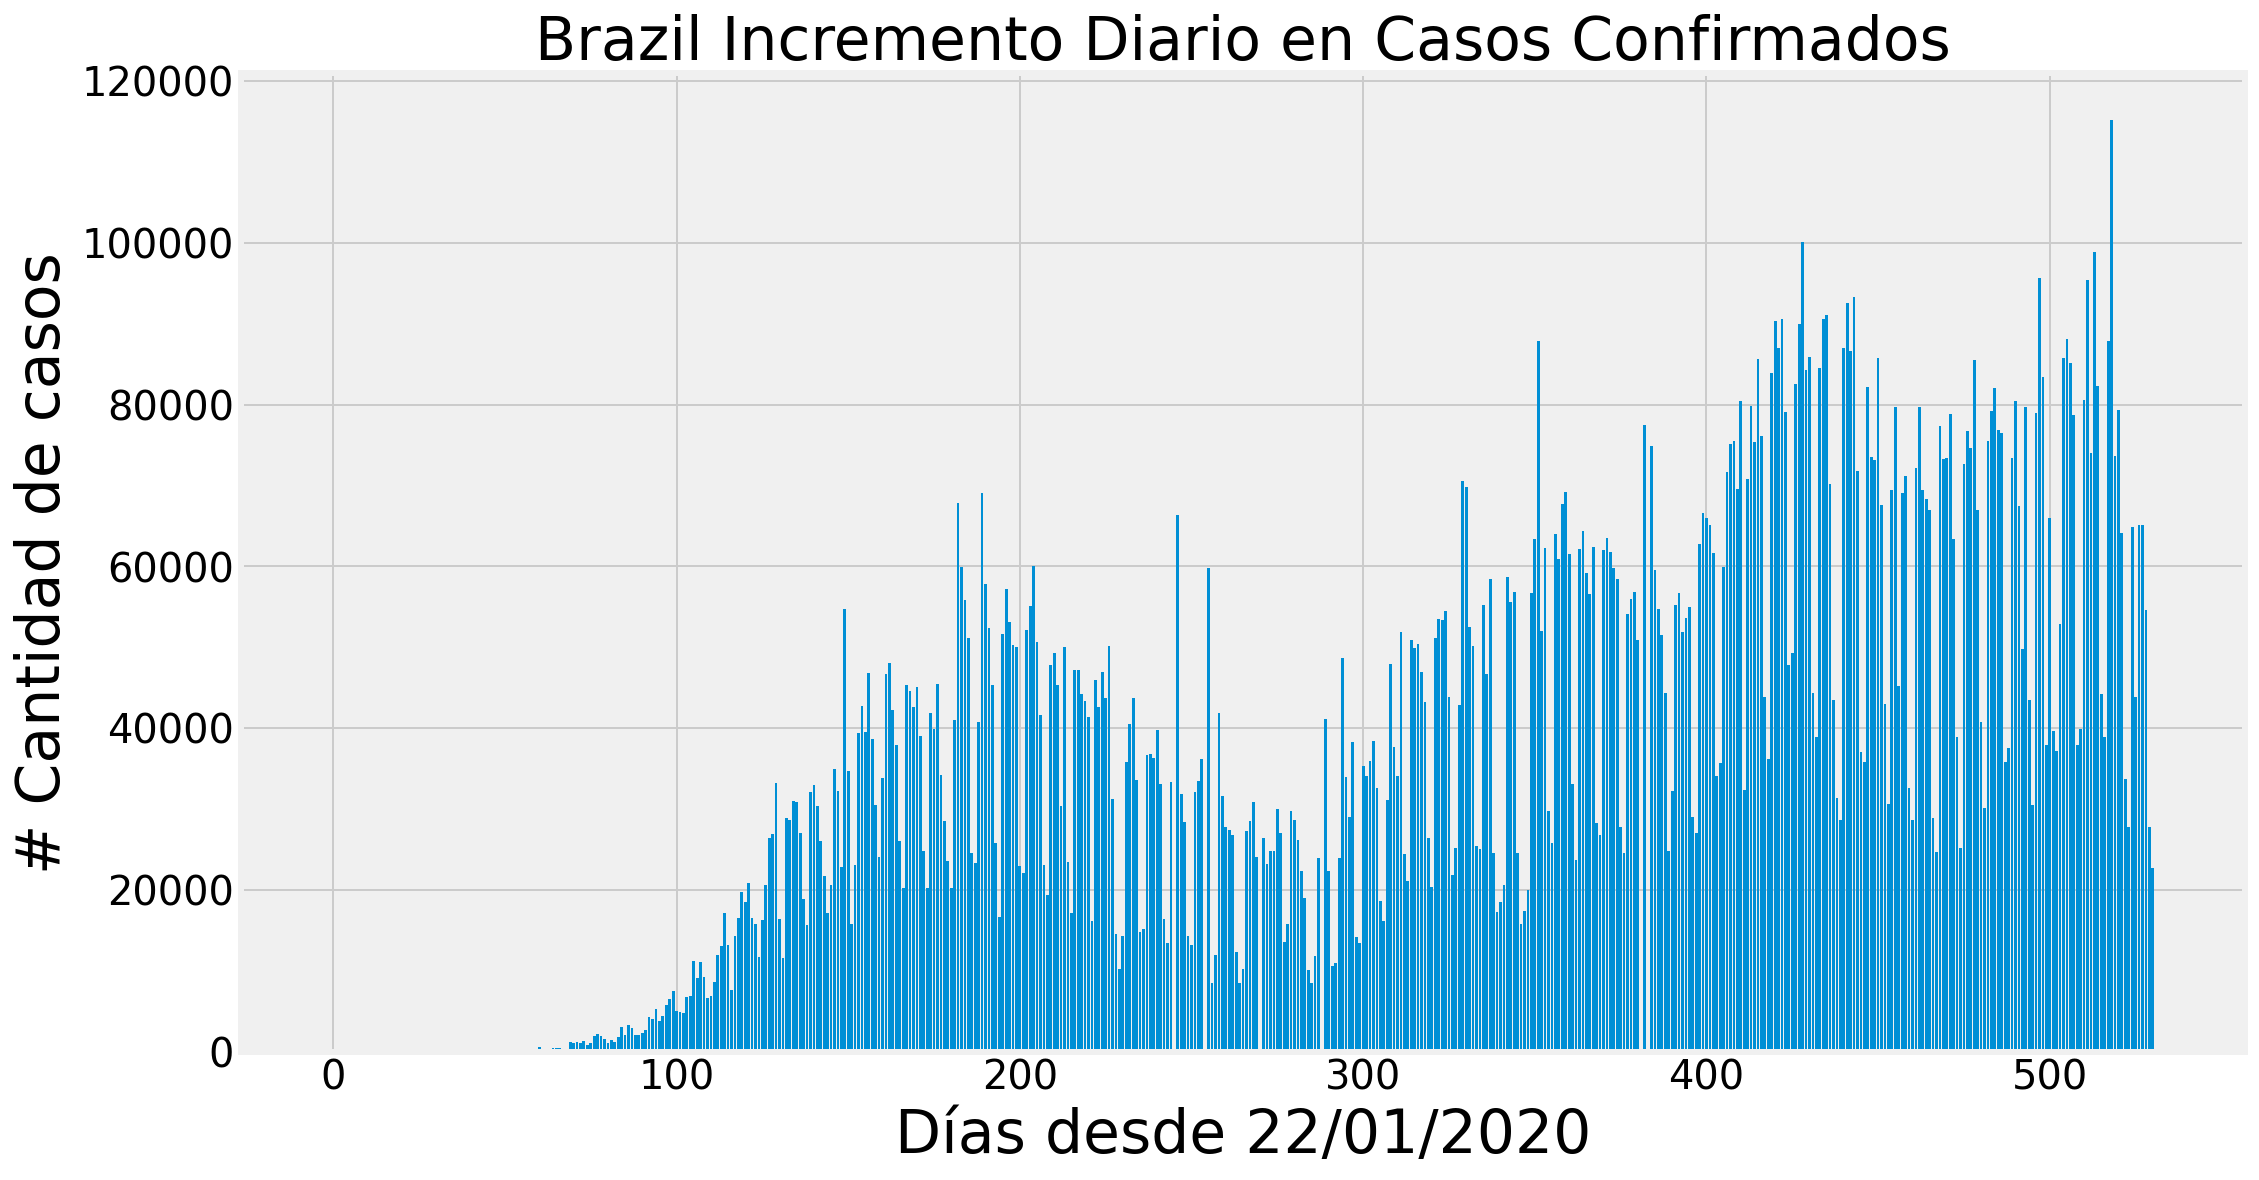

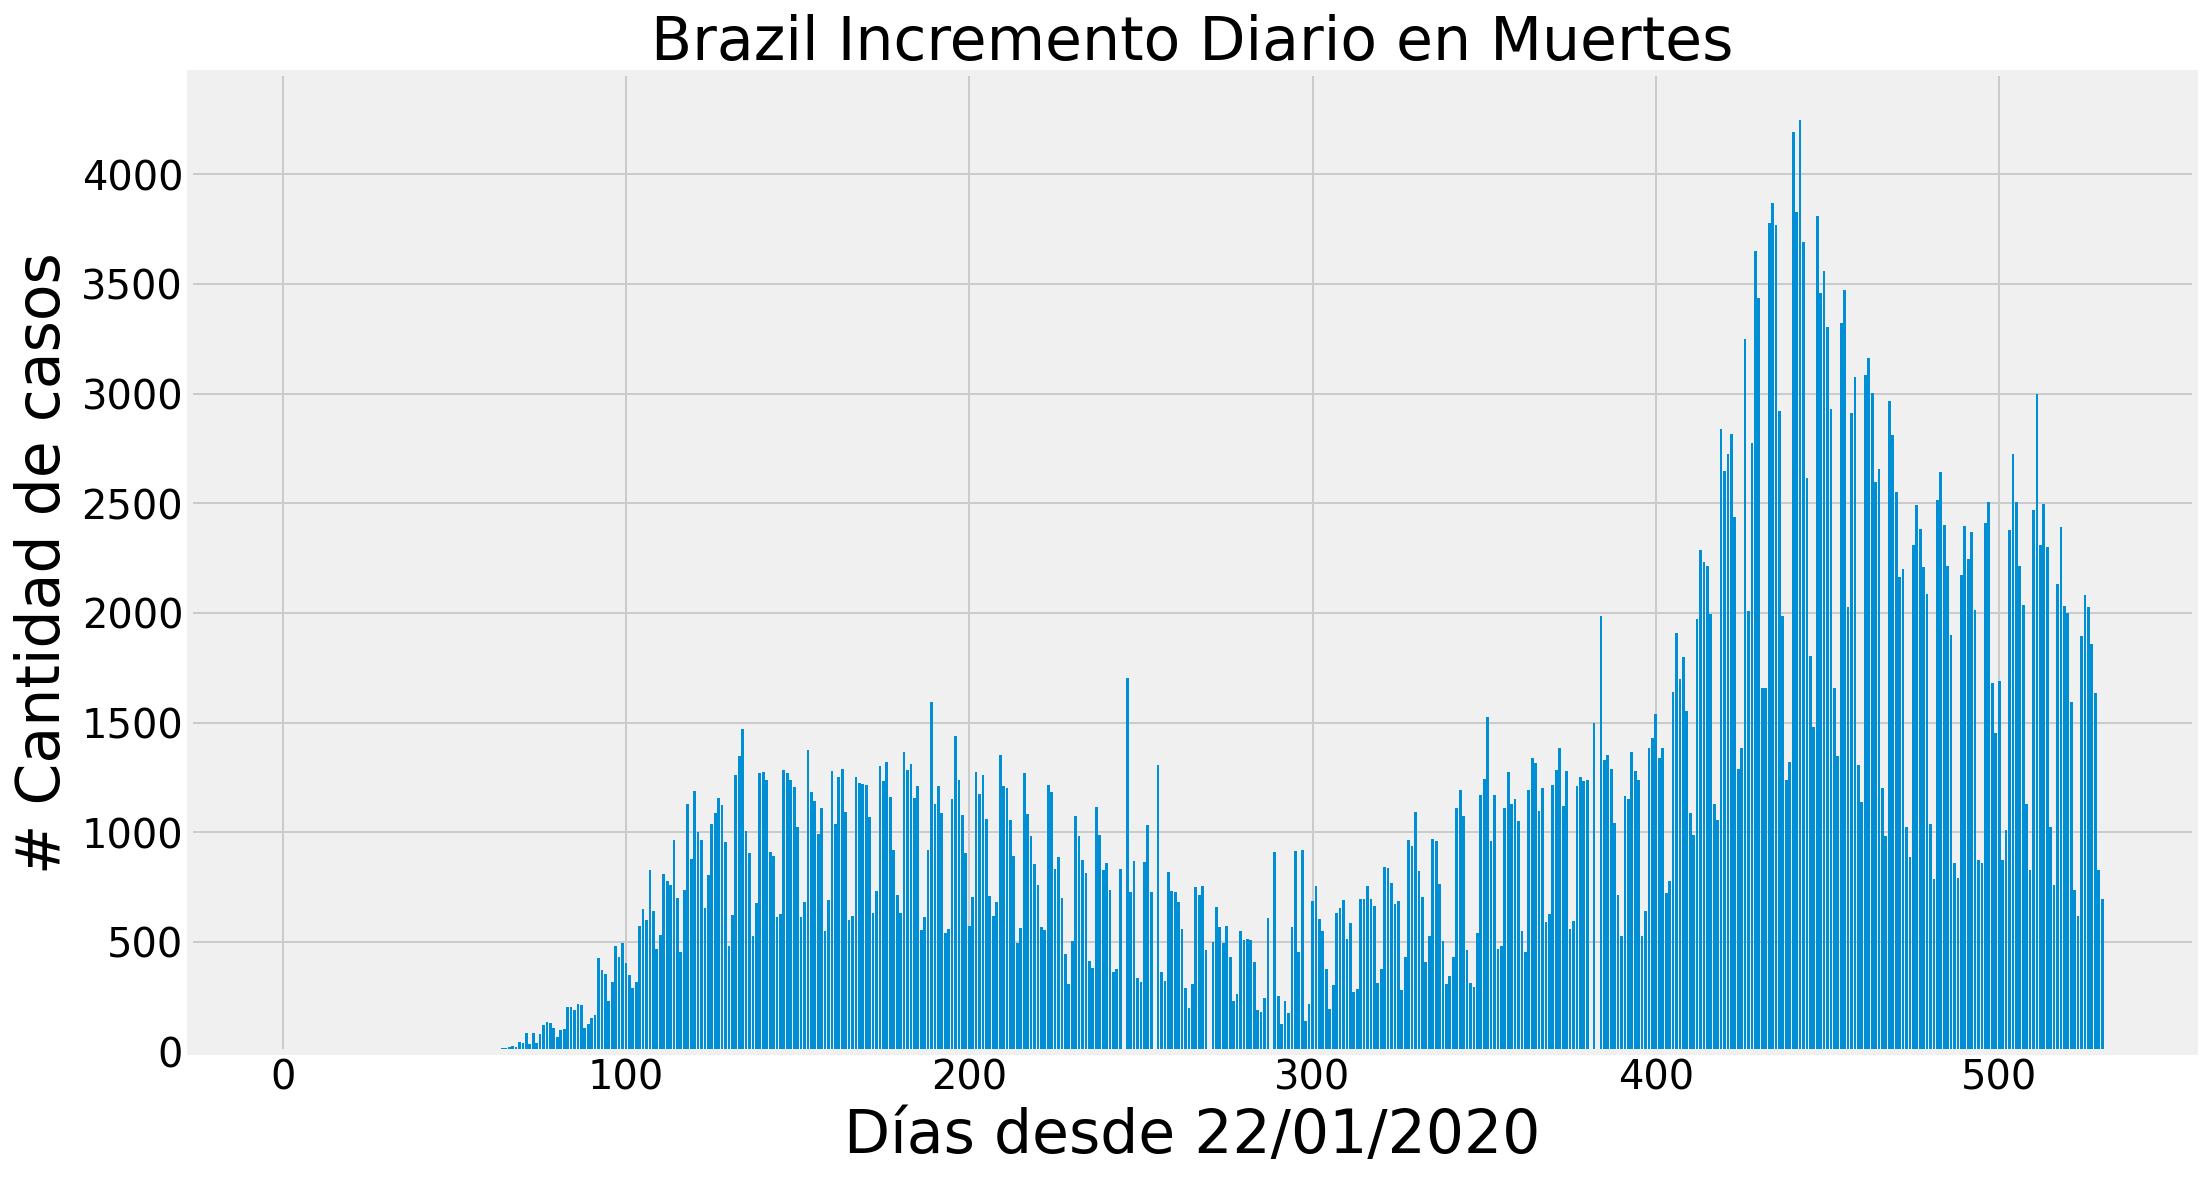

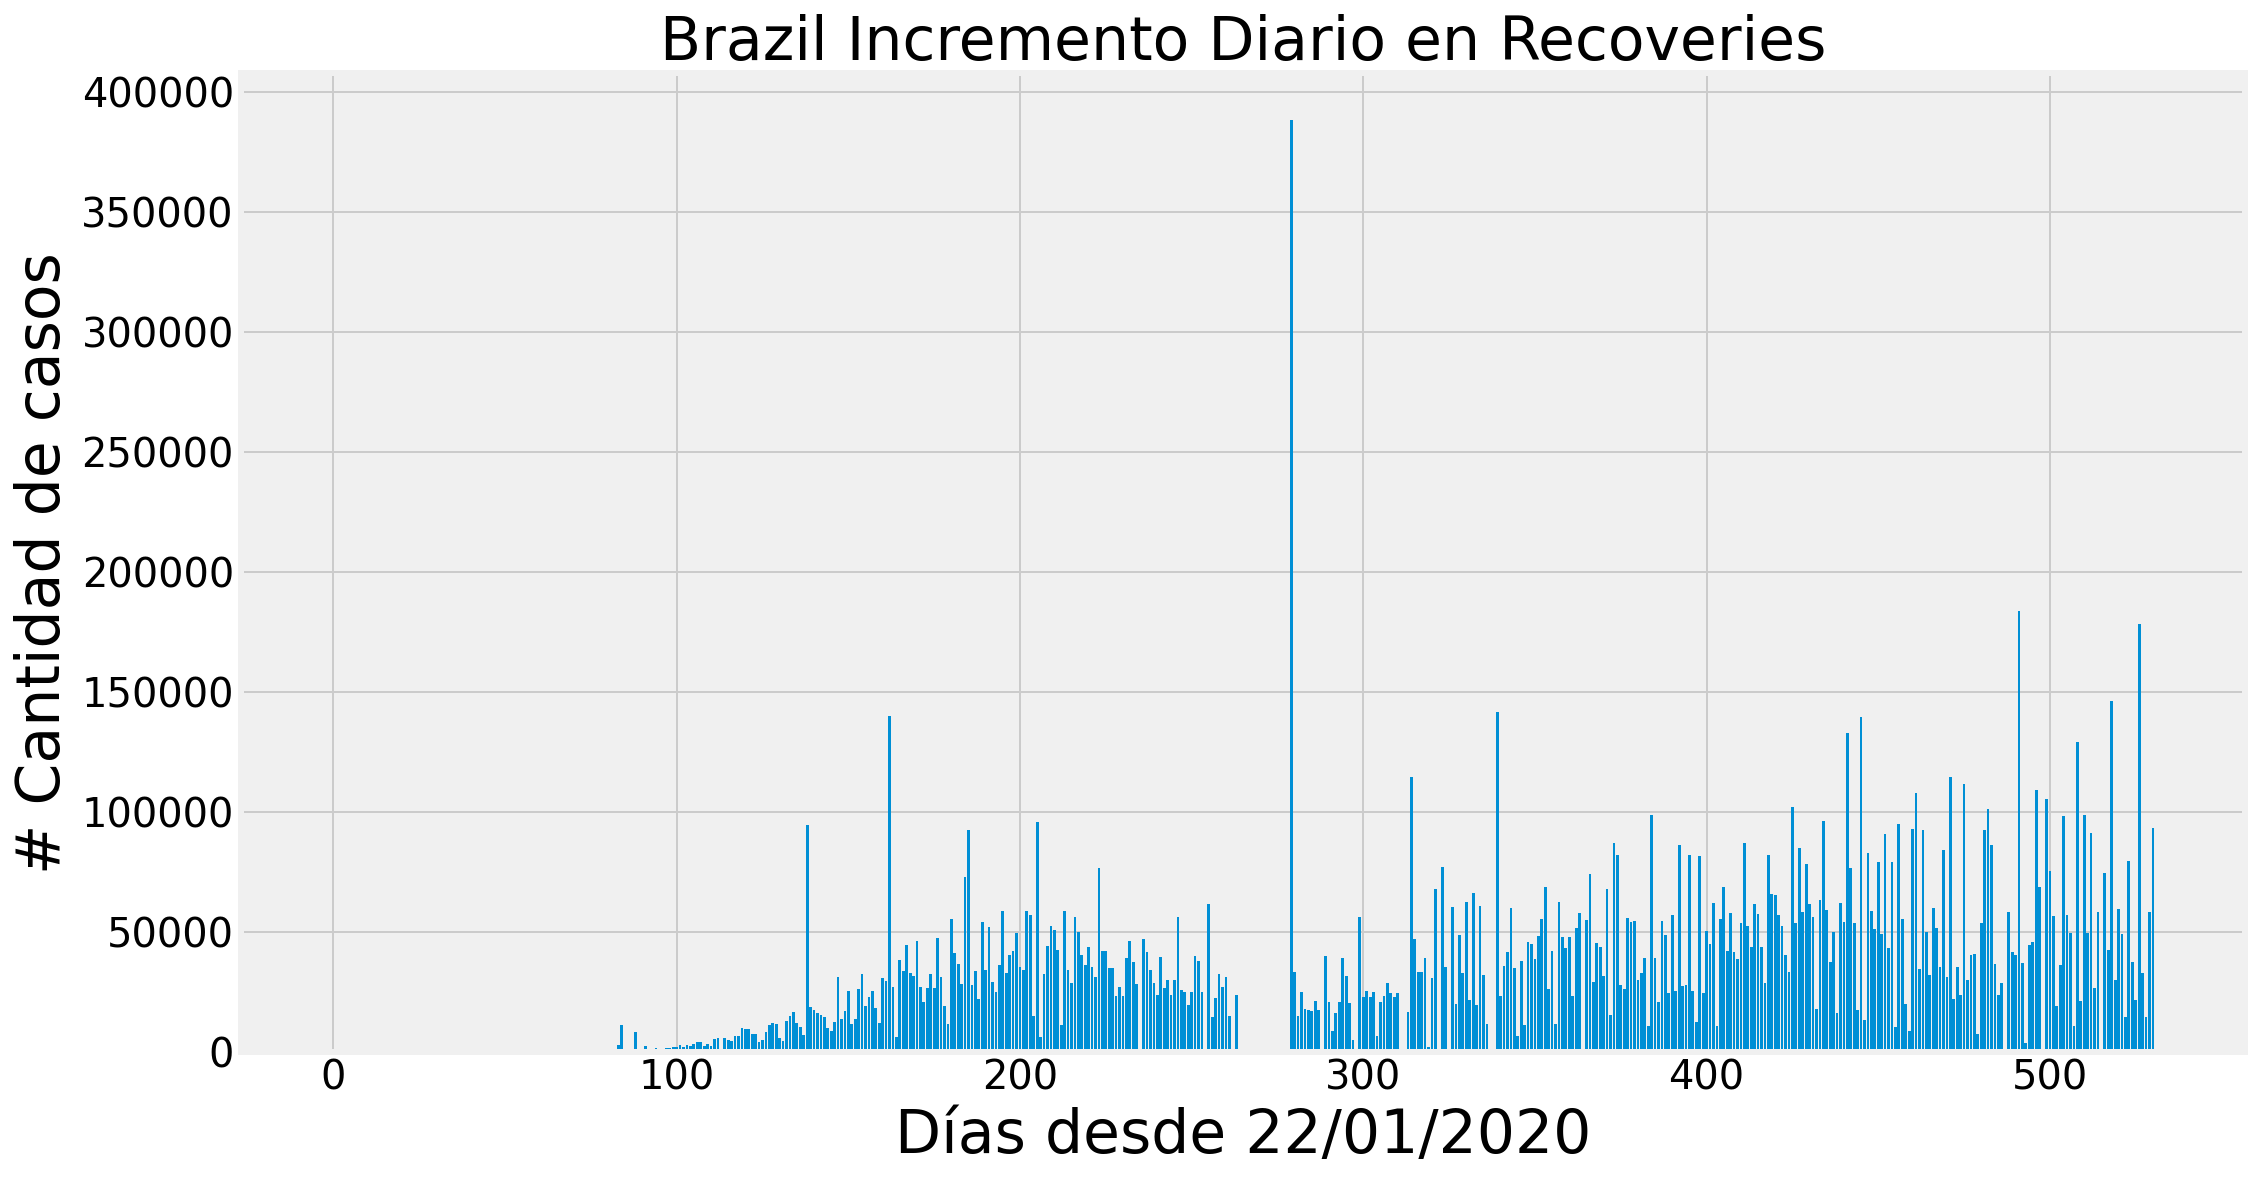

In [100]:
country_plot(adjusted_dates, brazil_cases, brazil_daily_increase, brazil_daily_death, brazil_daily_recovery, 'Brazil')


### 3.4 Casos de Estudio - Comparativa de Países

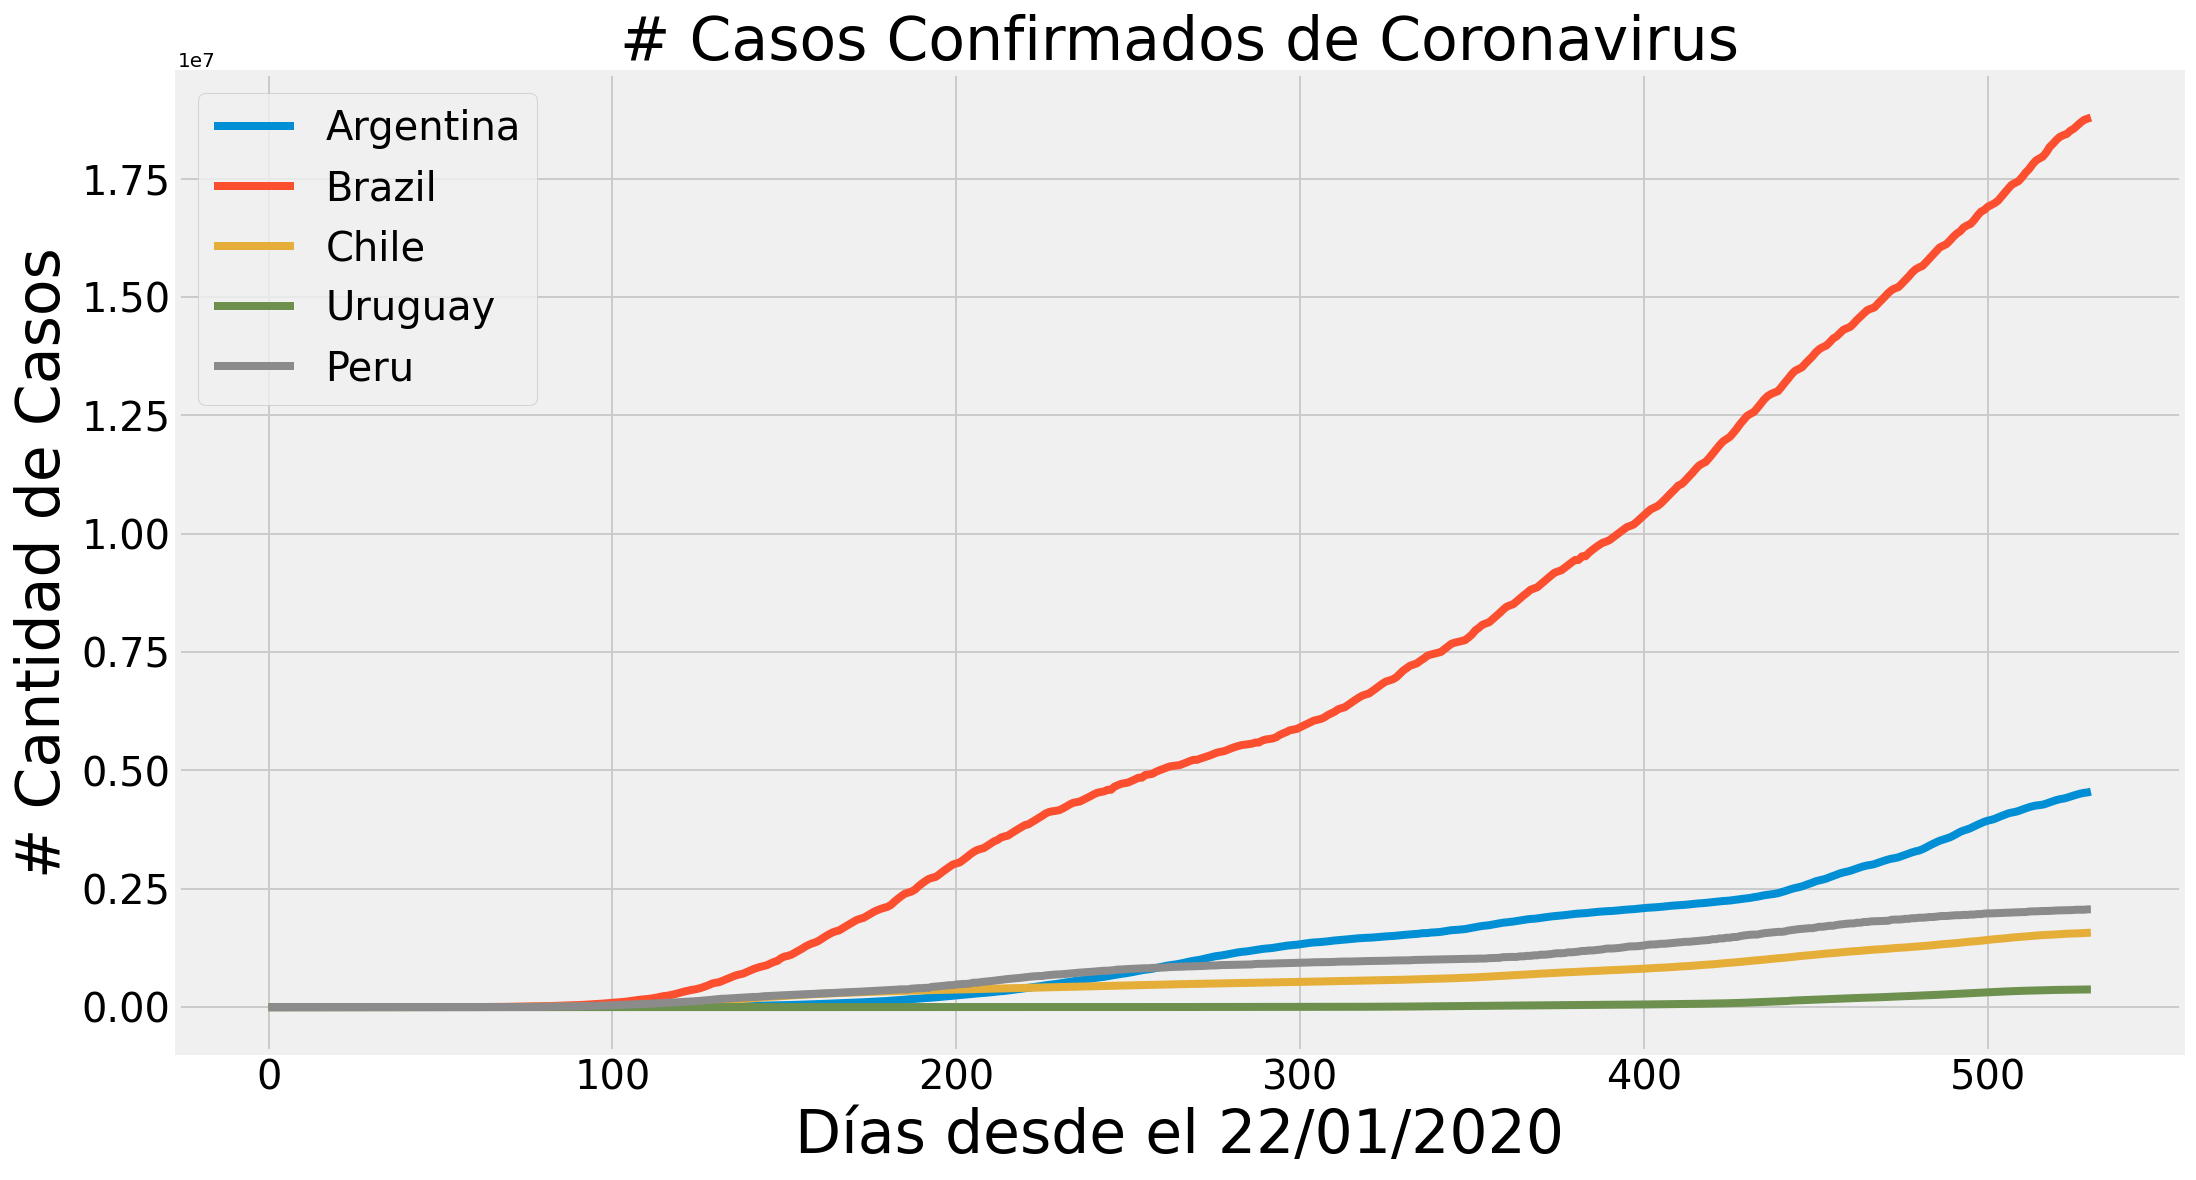

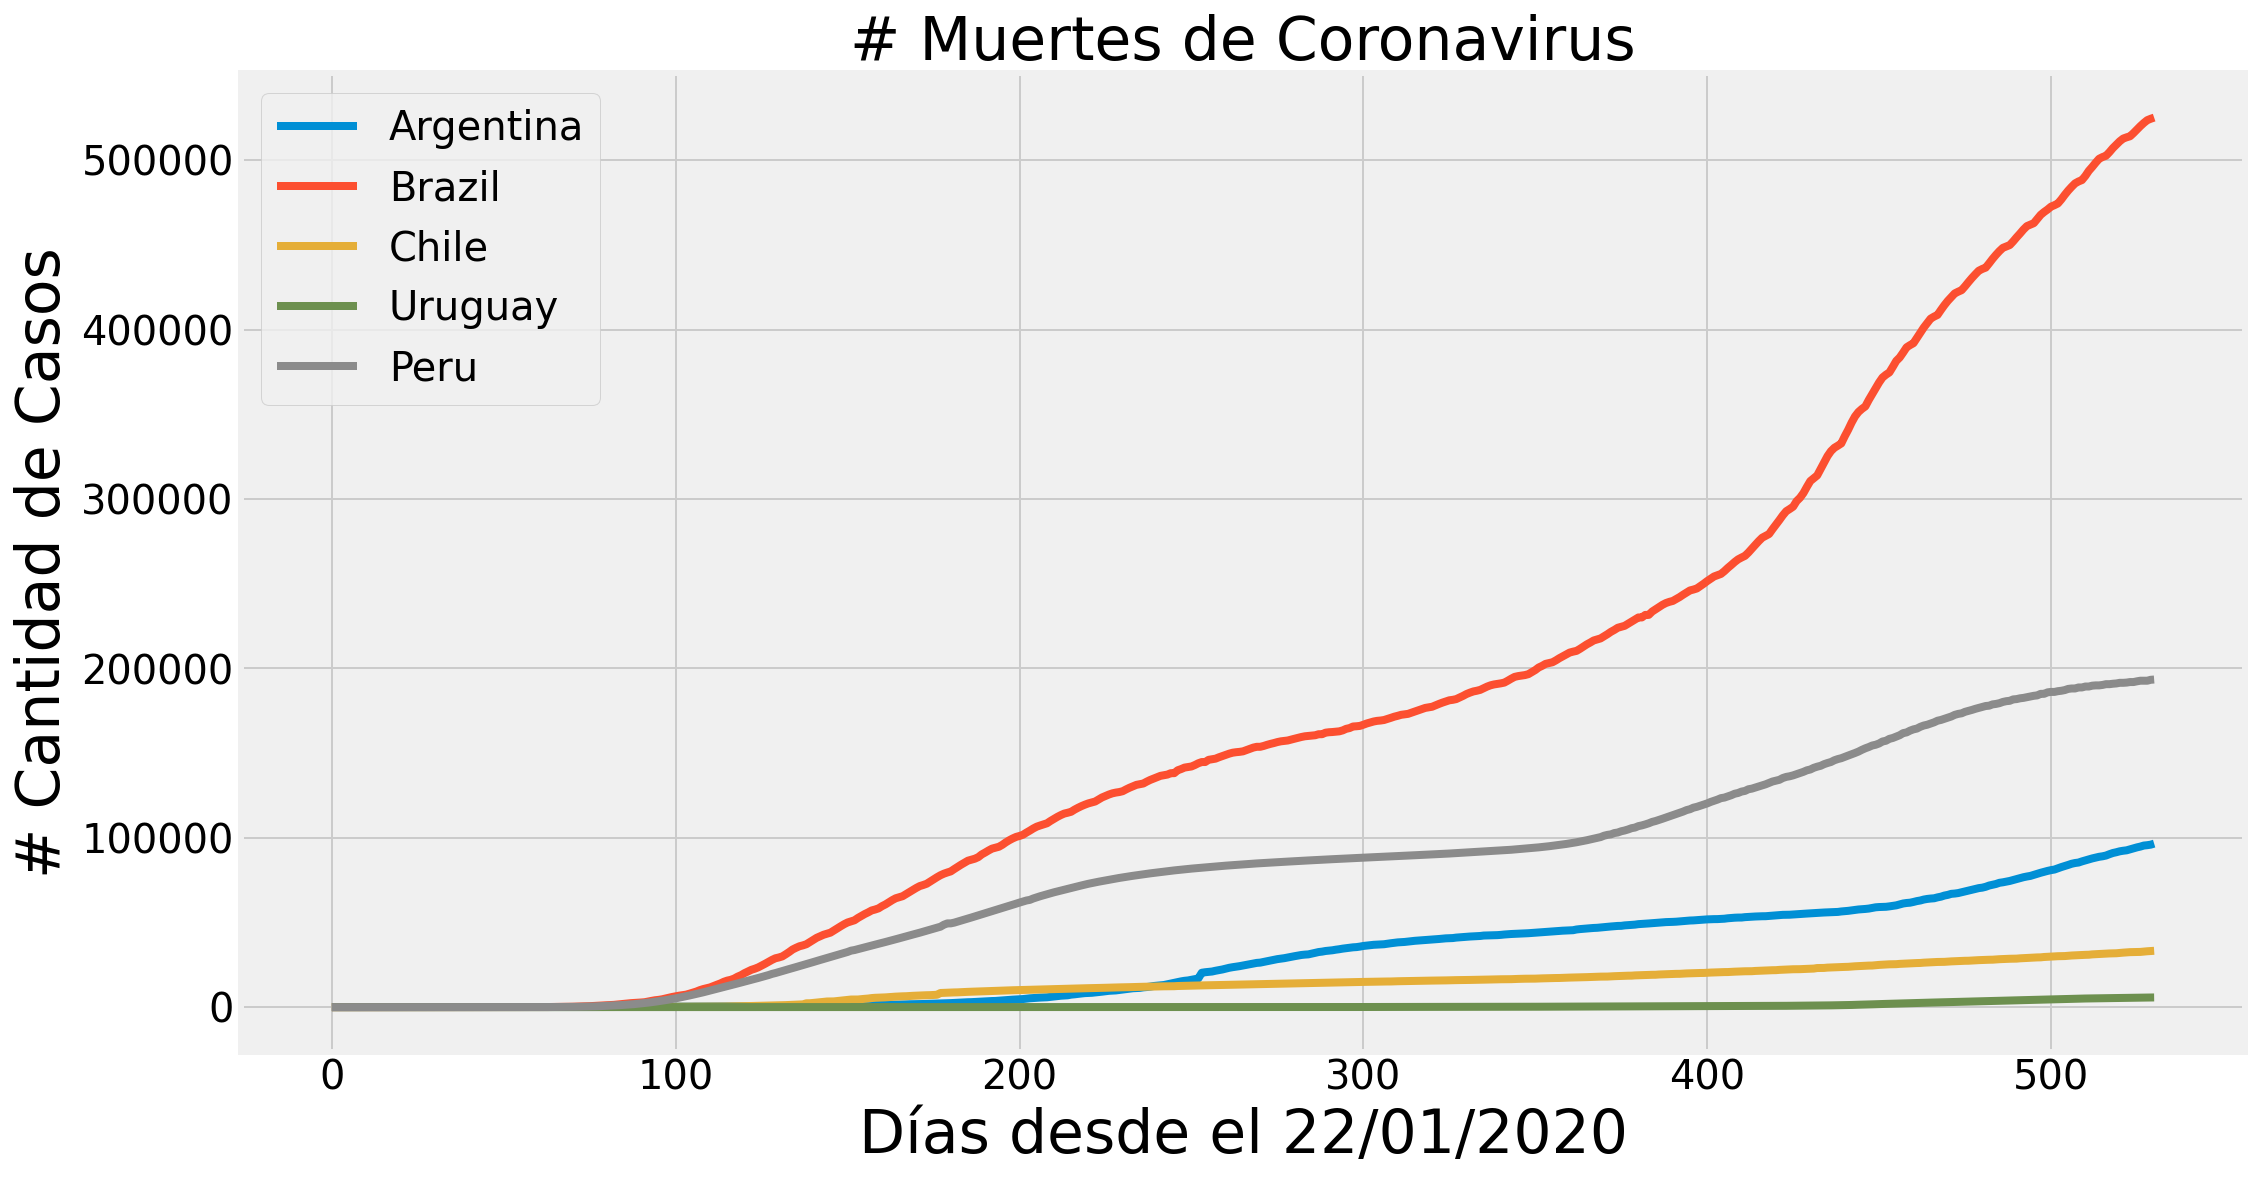

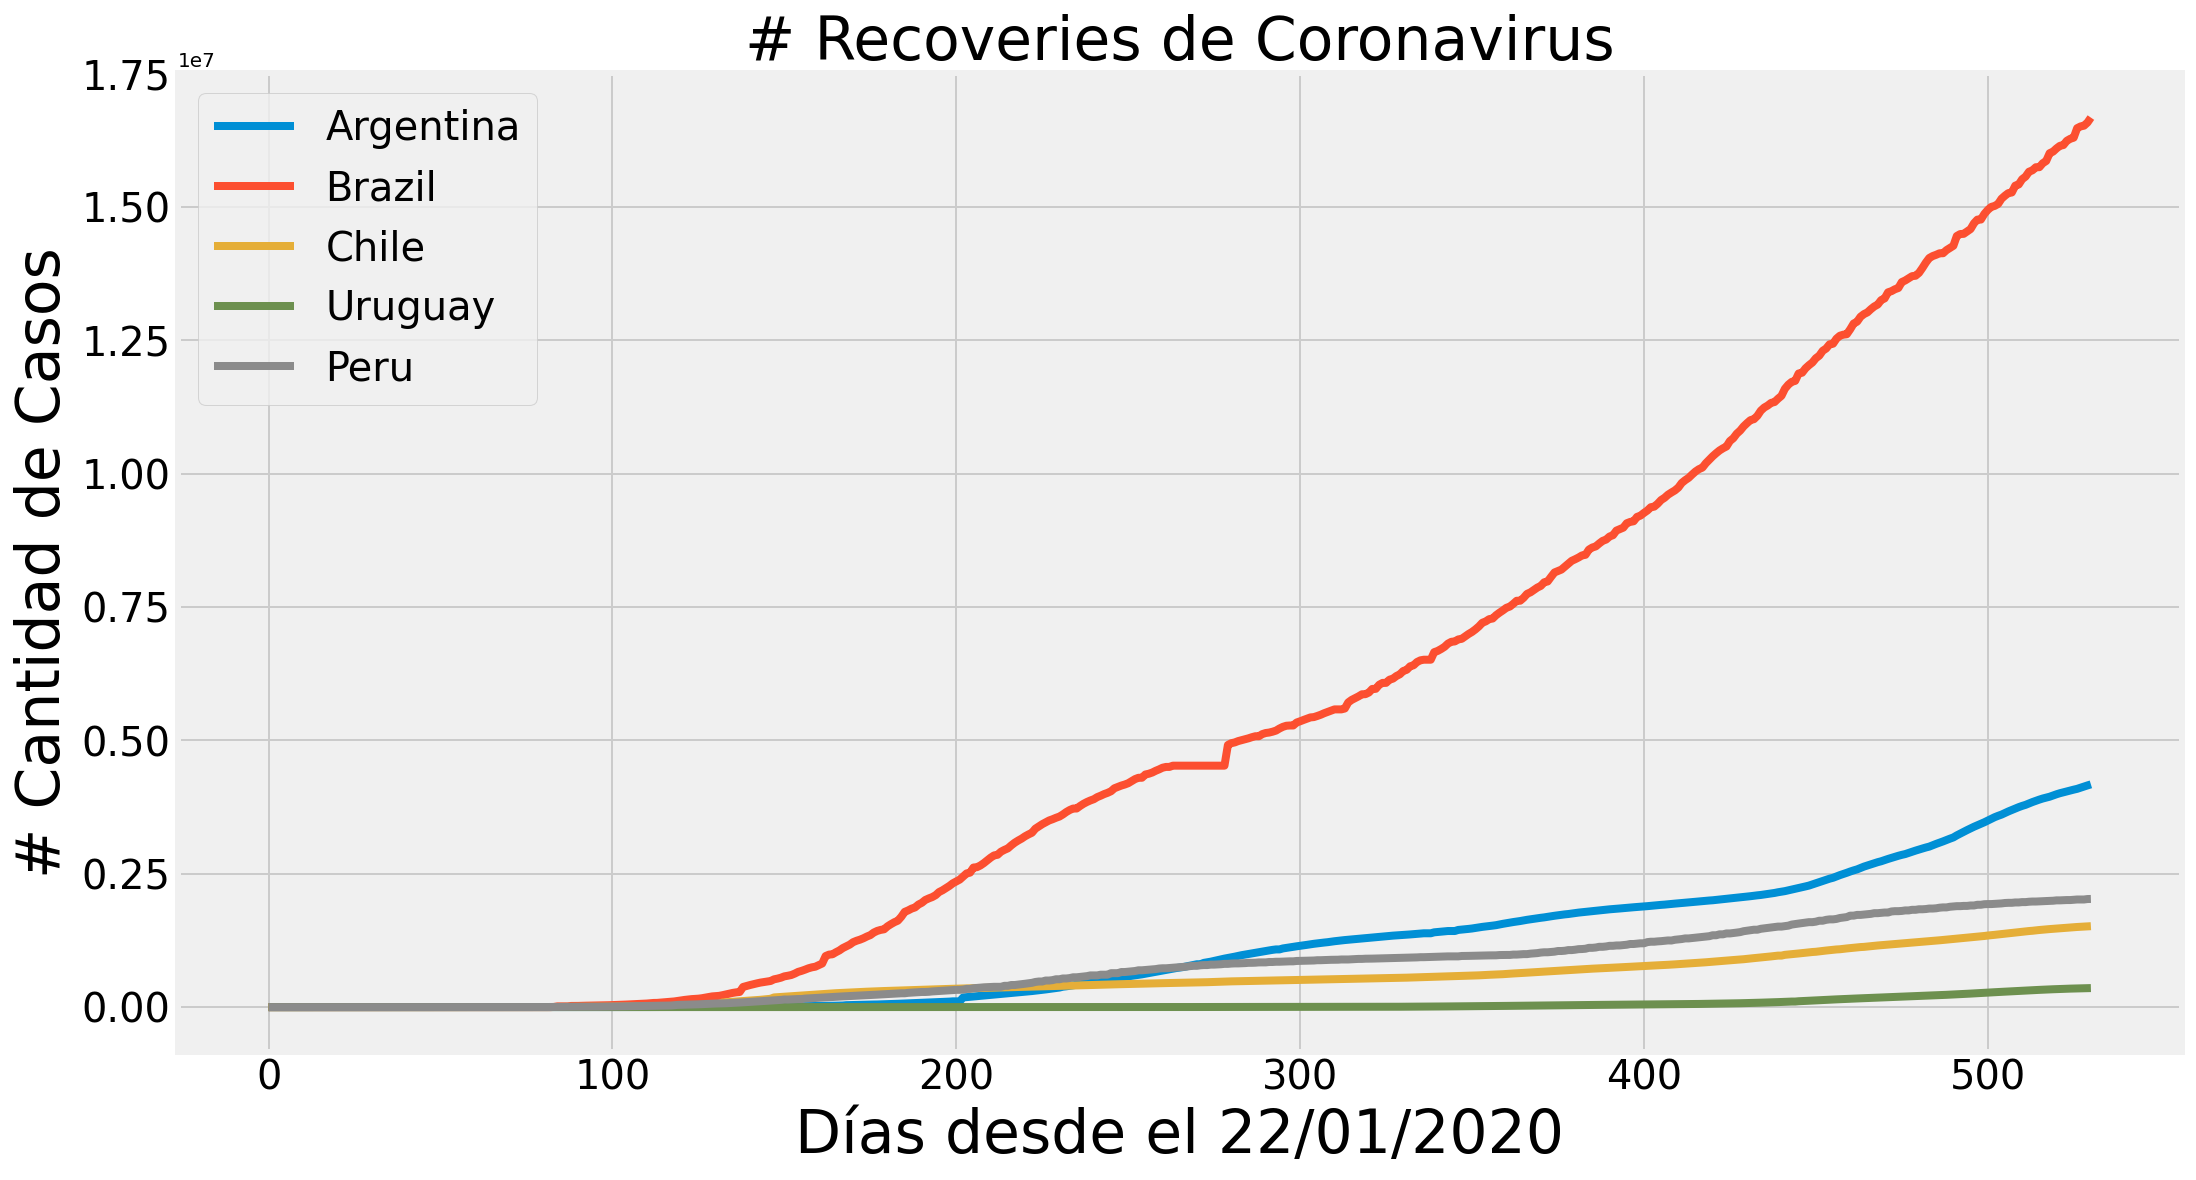

In [101]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, argentina_cases)
plt.plot(adjusted_dates, brazil_cases)
plt.plot(adjusted_dates, chile_cases)
plt.plot(adjusted_dates, uruguay_cases)
plt.plot(adjusted_dates, peru_cases)
plt.title('# Casos Confirmados de Coronavirus', size=30)
plt.xlabel('Días desde el 22/01/2020', size=30)
plt.ylabel('# Cantidad de Casos', size=30)
plt.legend(['Argentina', 'Brazil', 'Chile', 'Uruguay', 'Peru'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, argentina_deaths)
plt.plot(adjusted_dates, brazil_deaths)
plt.plot(adjusted_dates, chile_deaths)
plt.plot(adjusted_dates, uruguay_deaths)
plt.plot(adjusted_dates, peru_deaths)

plt.title('# Muertes de Coronavirus', size=30)
plt.xlabel('Días desde el 22/01/2020', size=30)
plt.ylabel('# Cantidad de Casos', size=30)
plt.legend(['Argentina', 'Brazil', 'Chile', 'Uruguay', 'Peru'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, argentina_recoveries)
plt.plot(adjusted_dates, brazil_recoveries)
plt.plot(adjusted_dates, chile_recoveries)
plt.plot(adjusted_dates, uruguay_recoveries)
plt.plot(adjusted_dates, peru_recoveries)

plt.title('# Recoveries de Coronavirus', size=30)
plt.xlabel('Días desde el 22/01/2020', size=30)
plt.ylabel('# Cantidad de Casos', size=30)
plt.legend(['Argentina', 'Brazil', 'Chile', 'Uruguay', 'Peru'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# 4. Definición y Entrenamiento de Modelos Predictivos
Definición y entrenamiento

*Usamos 3 modelos:*

*   SVM - Support Vector Machine
*   Bayesian Ridge
*   Polynomial Regression









## 4.0 Definimos data de entrenamiendo/validación


In [117]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [118]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern)
#X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], world_cases[50:], test_size=0.03, shuffle=False) 
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.36, shuffle=False)

## 4.1 MODELO SVM (Support Vector Machine)

Las máquinas de vectores de soporte o máquinas de vector soporte son un conjunto de algoritmos de aprendizaje supervisado utilizados para problemas de clasificación y regresión o predicción como este caso.

In [119]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 42296023.57430413
MSE: 2945487858481661.0


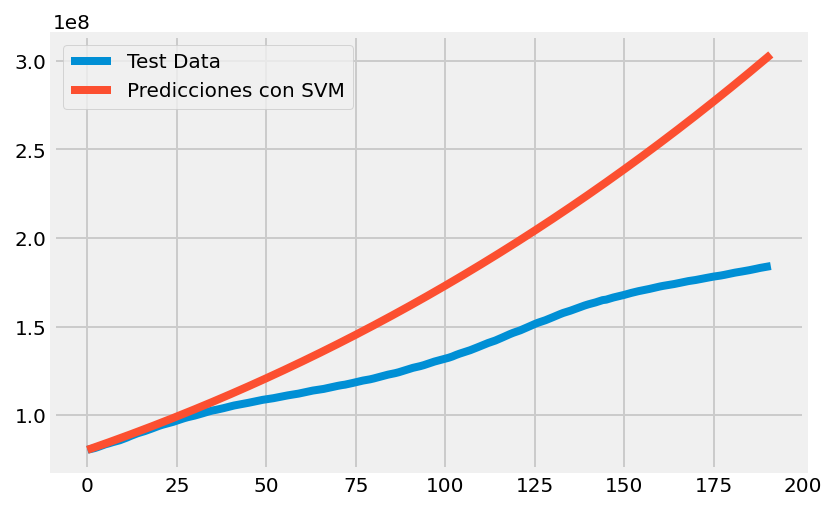

In [120]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'Predicciones con SVM'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

## 4.2 MODELO POLYNOMIAN REGRESSION 

Polynomial regression se considera un caso especial de múltiple regresión lineal.

In [121]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [122]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 78978232.90775856
MSE: 1.0734281810831626e+16


In [123]:
print(linear_model.coef_)


[[ 8.73878229e+05 -7.48894004e+04  1.32774430e+03 -4.35644816e+00
   9.31008552e-03]]


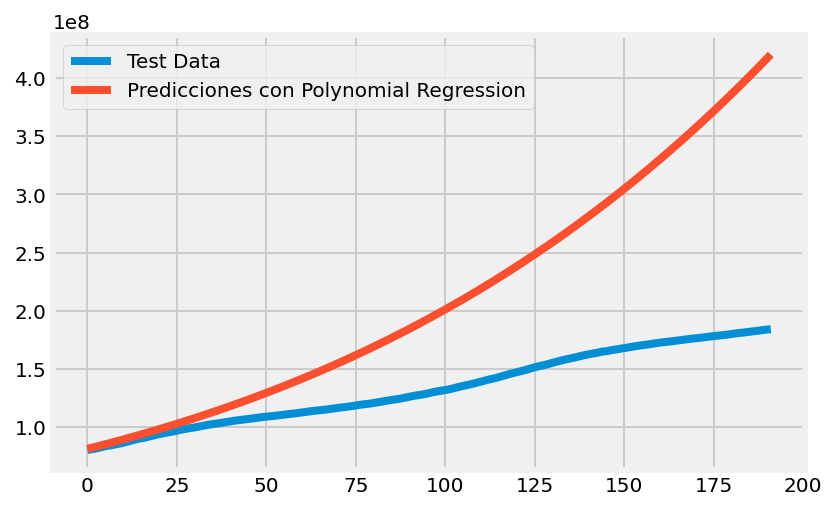

In [124]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Predicciones con Polynomial Regression'])

## 4.2 MODELO BAYESIAN RIDGE 

El modelo Bayesian Ridge, o también llamada regresión lineal bayesiana es un enfoque de regresión lineal en el que el análisis estadístico se lleva a cabo dentro del contexto de la inferencia bayesiana.

In [125]:
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.3s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=False,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                  

In [126]:
bayesian_search.best_params_


{'alpha_1': 1e-07,
 'alpha_2': 1e-05,
 'lambda_1': 0.001,
 'lambda_2': 1e-07,
 'normalize': False,
 'tol': 1e-06}

In [127]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 114820145.59330718
MSE: 2.3954496944957364e+16


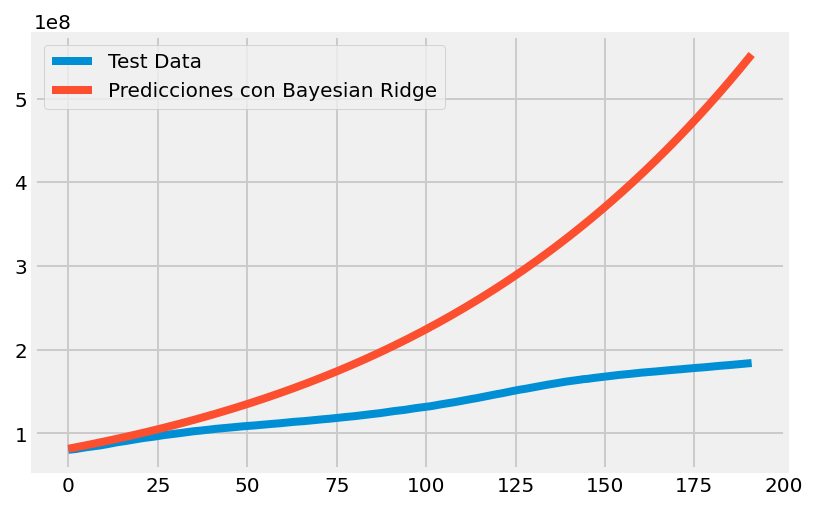

In [128]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Predicciones con Bayesian Ridge'])

# 5. Uso de Modelos Predictivos creados

*Probamos los 3 modelos:*

*   SVM - Support Vector Machine
*   Bayesian Ridge
*   Polynomial Regression


## 5.1 Defino función de predicción

In [129]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('# Casos de Coronavirus en el Tiempo', size=30)
    plt.xlabel('Días desde el 22/01/2020', size=30)
    plt.ylabel('# Cantidad de Casos', size=30)
    plt.legend(['Casos Confirmados', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

## 5.2 Usamos modelos predictivos con casos Globales

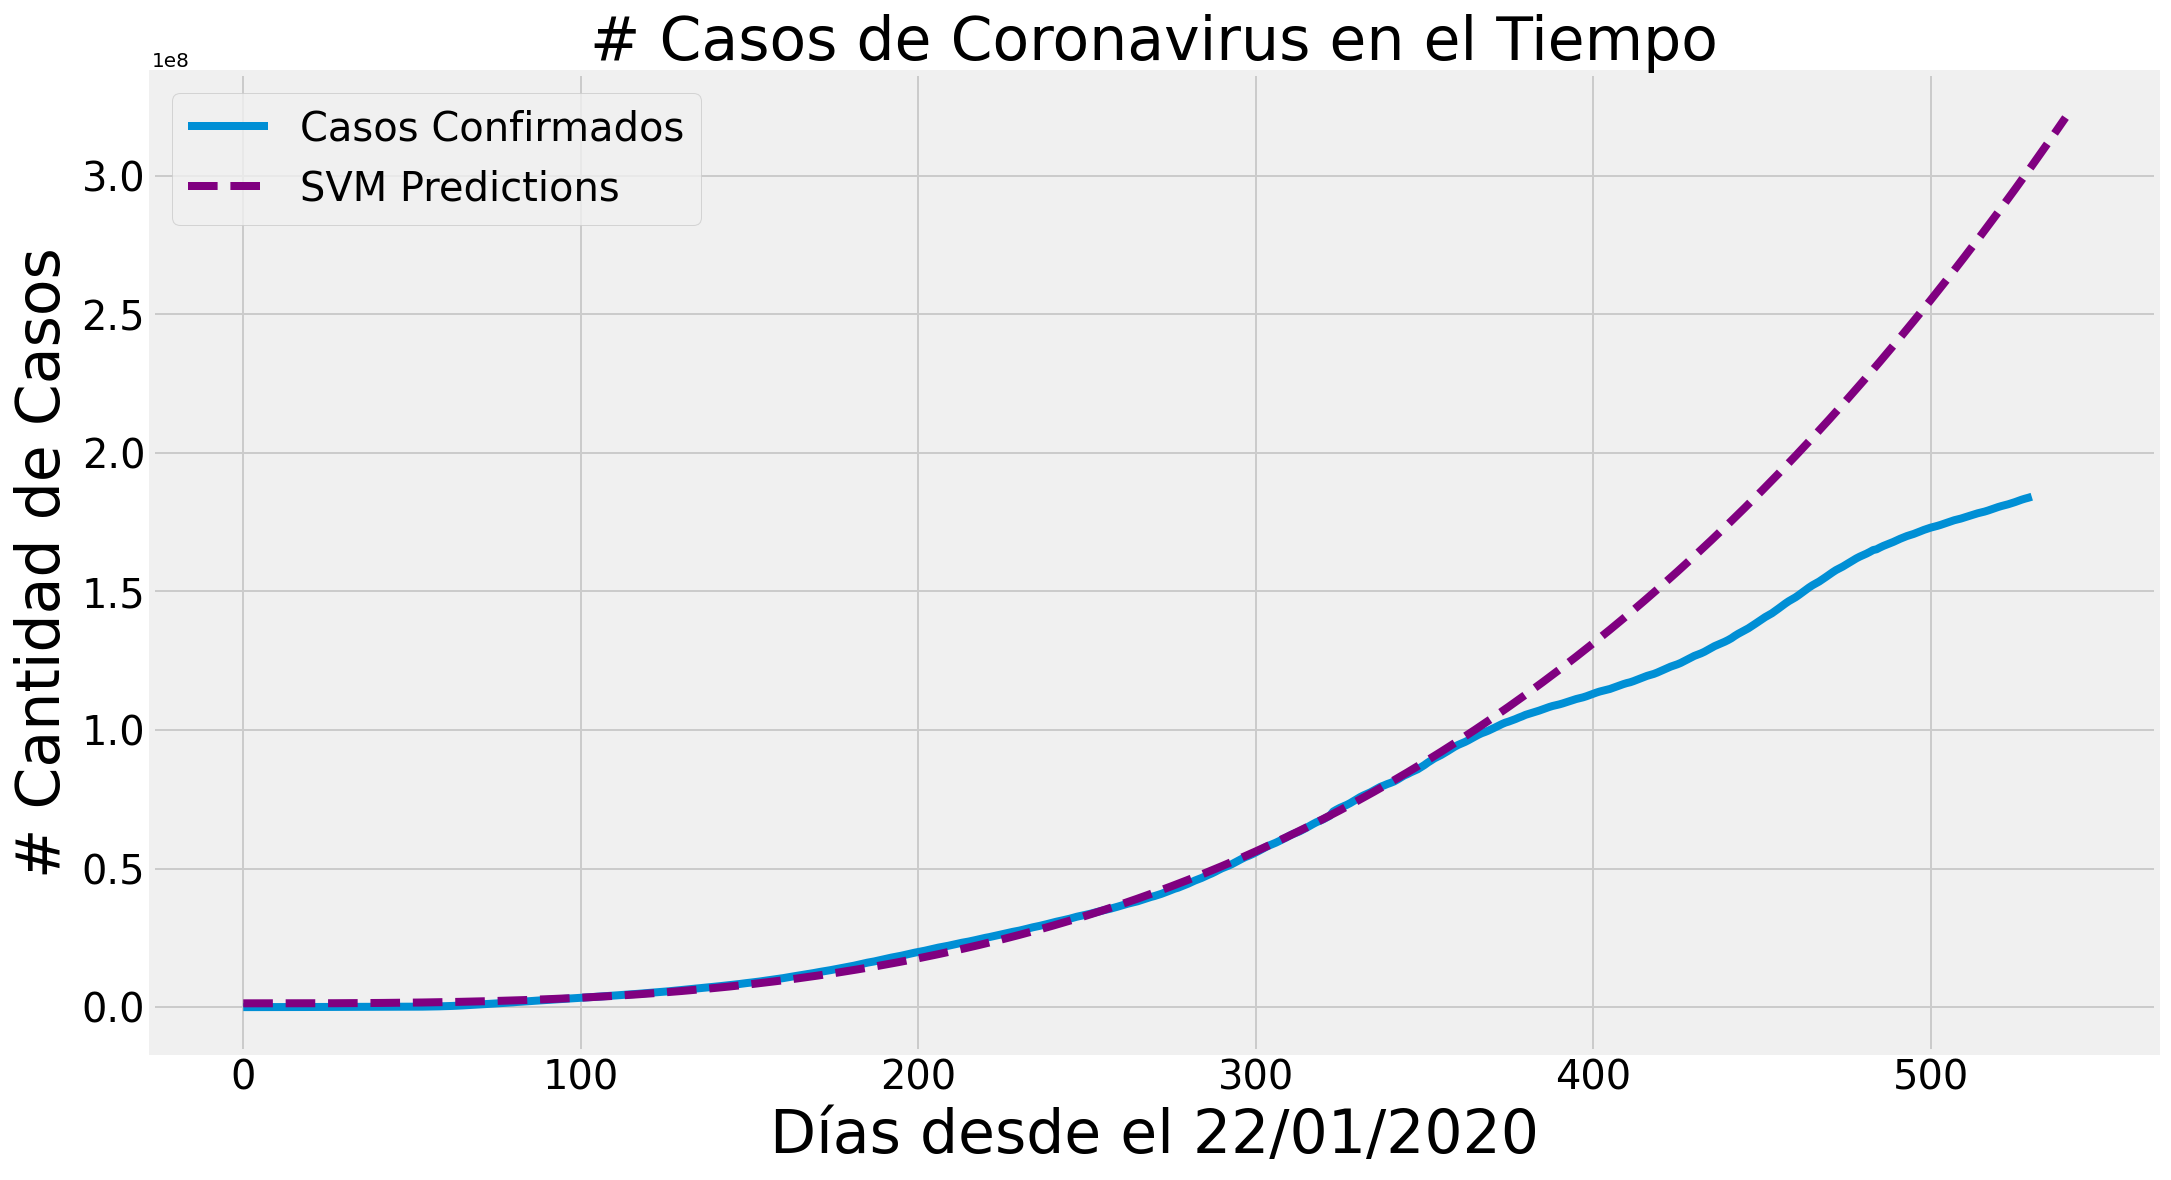

In [130]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'purple')

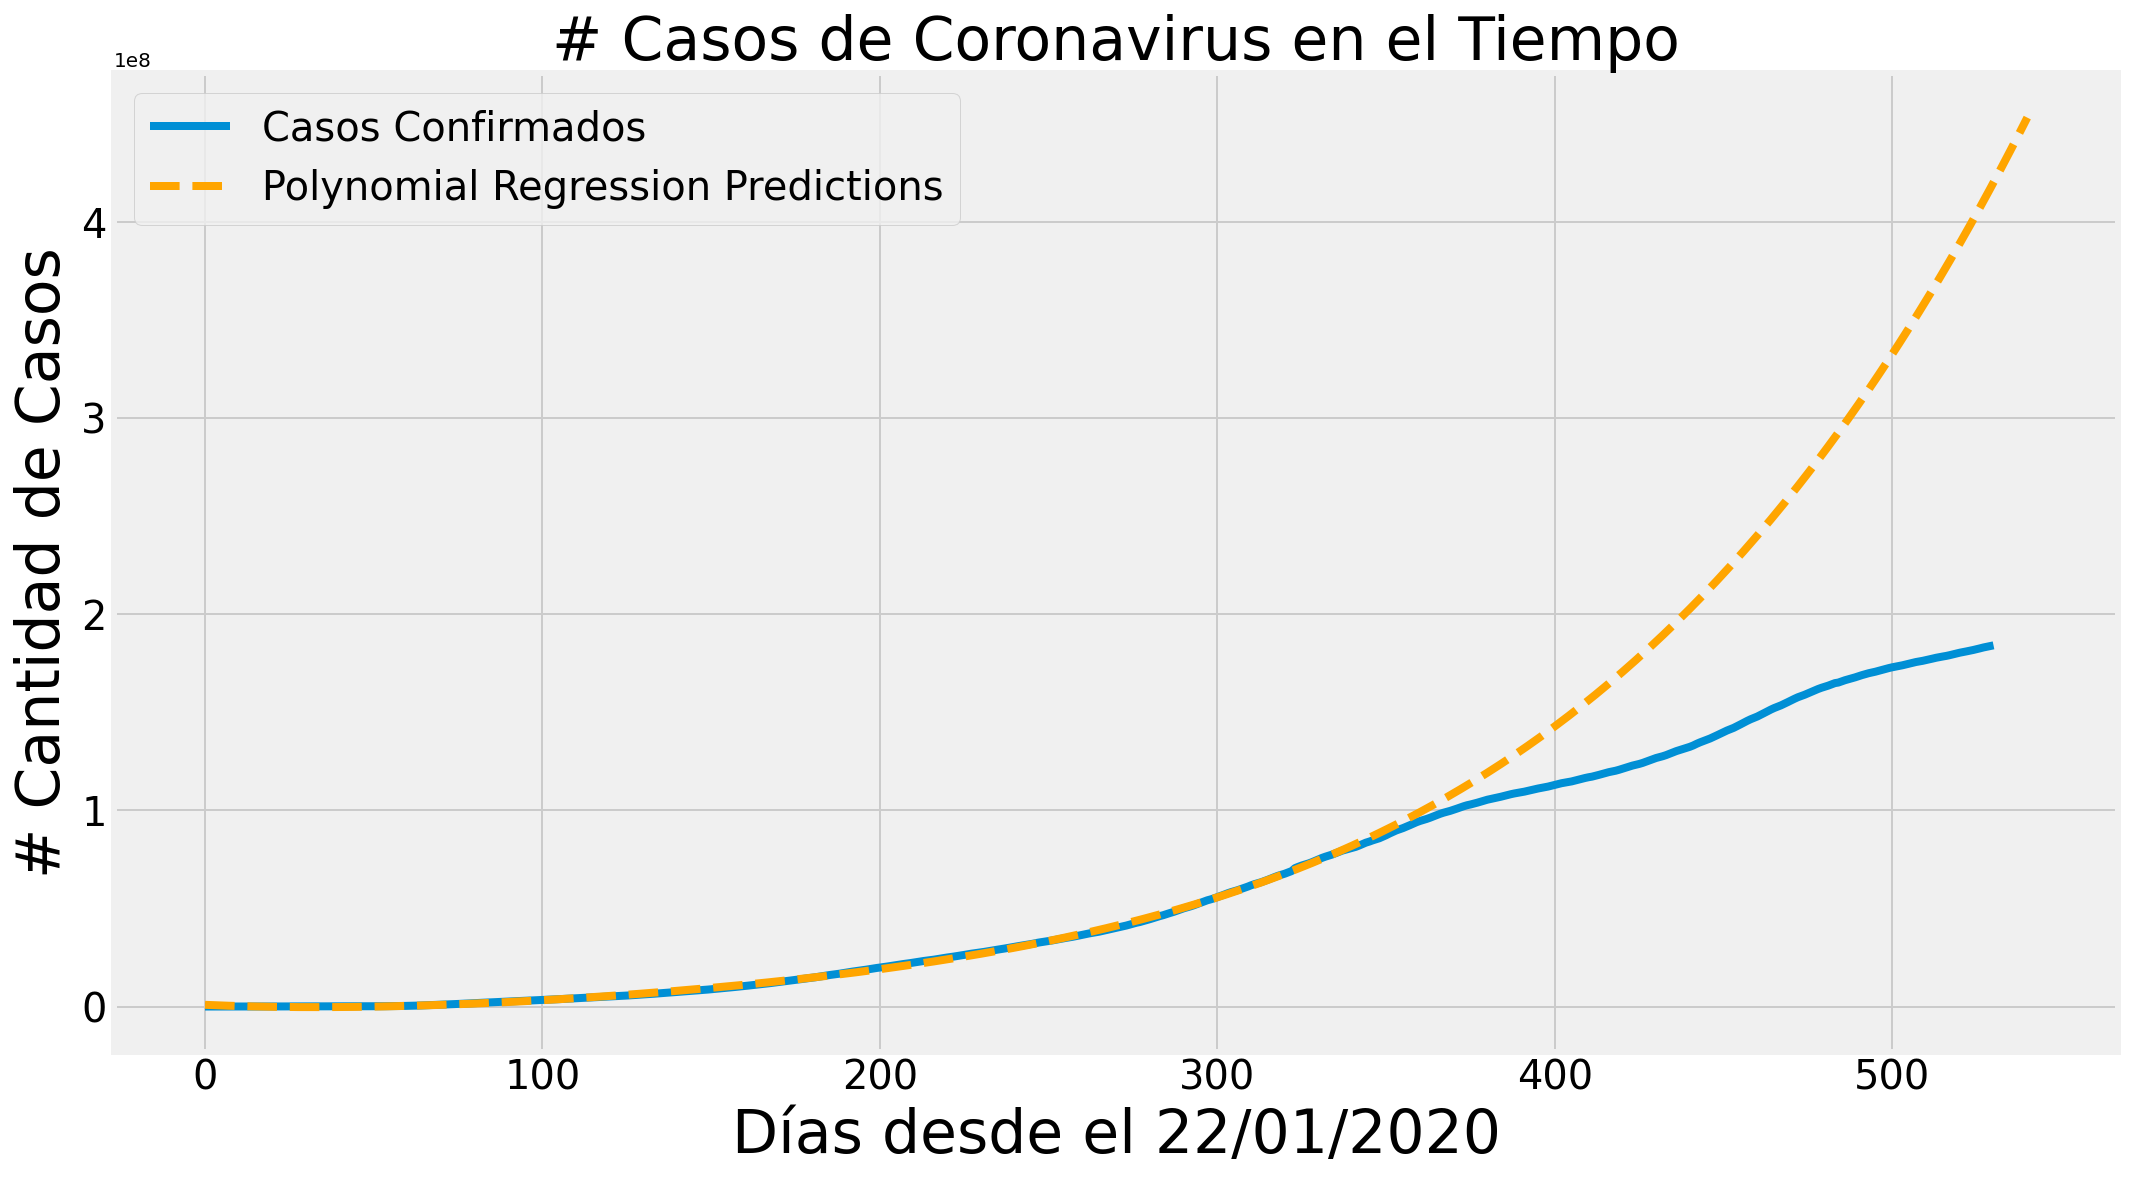

In [131]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')

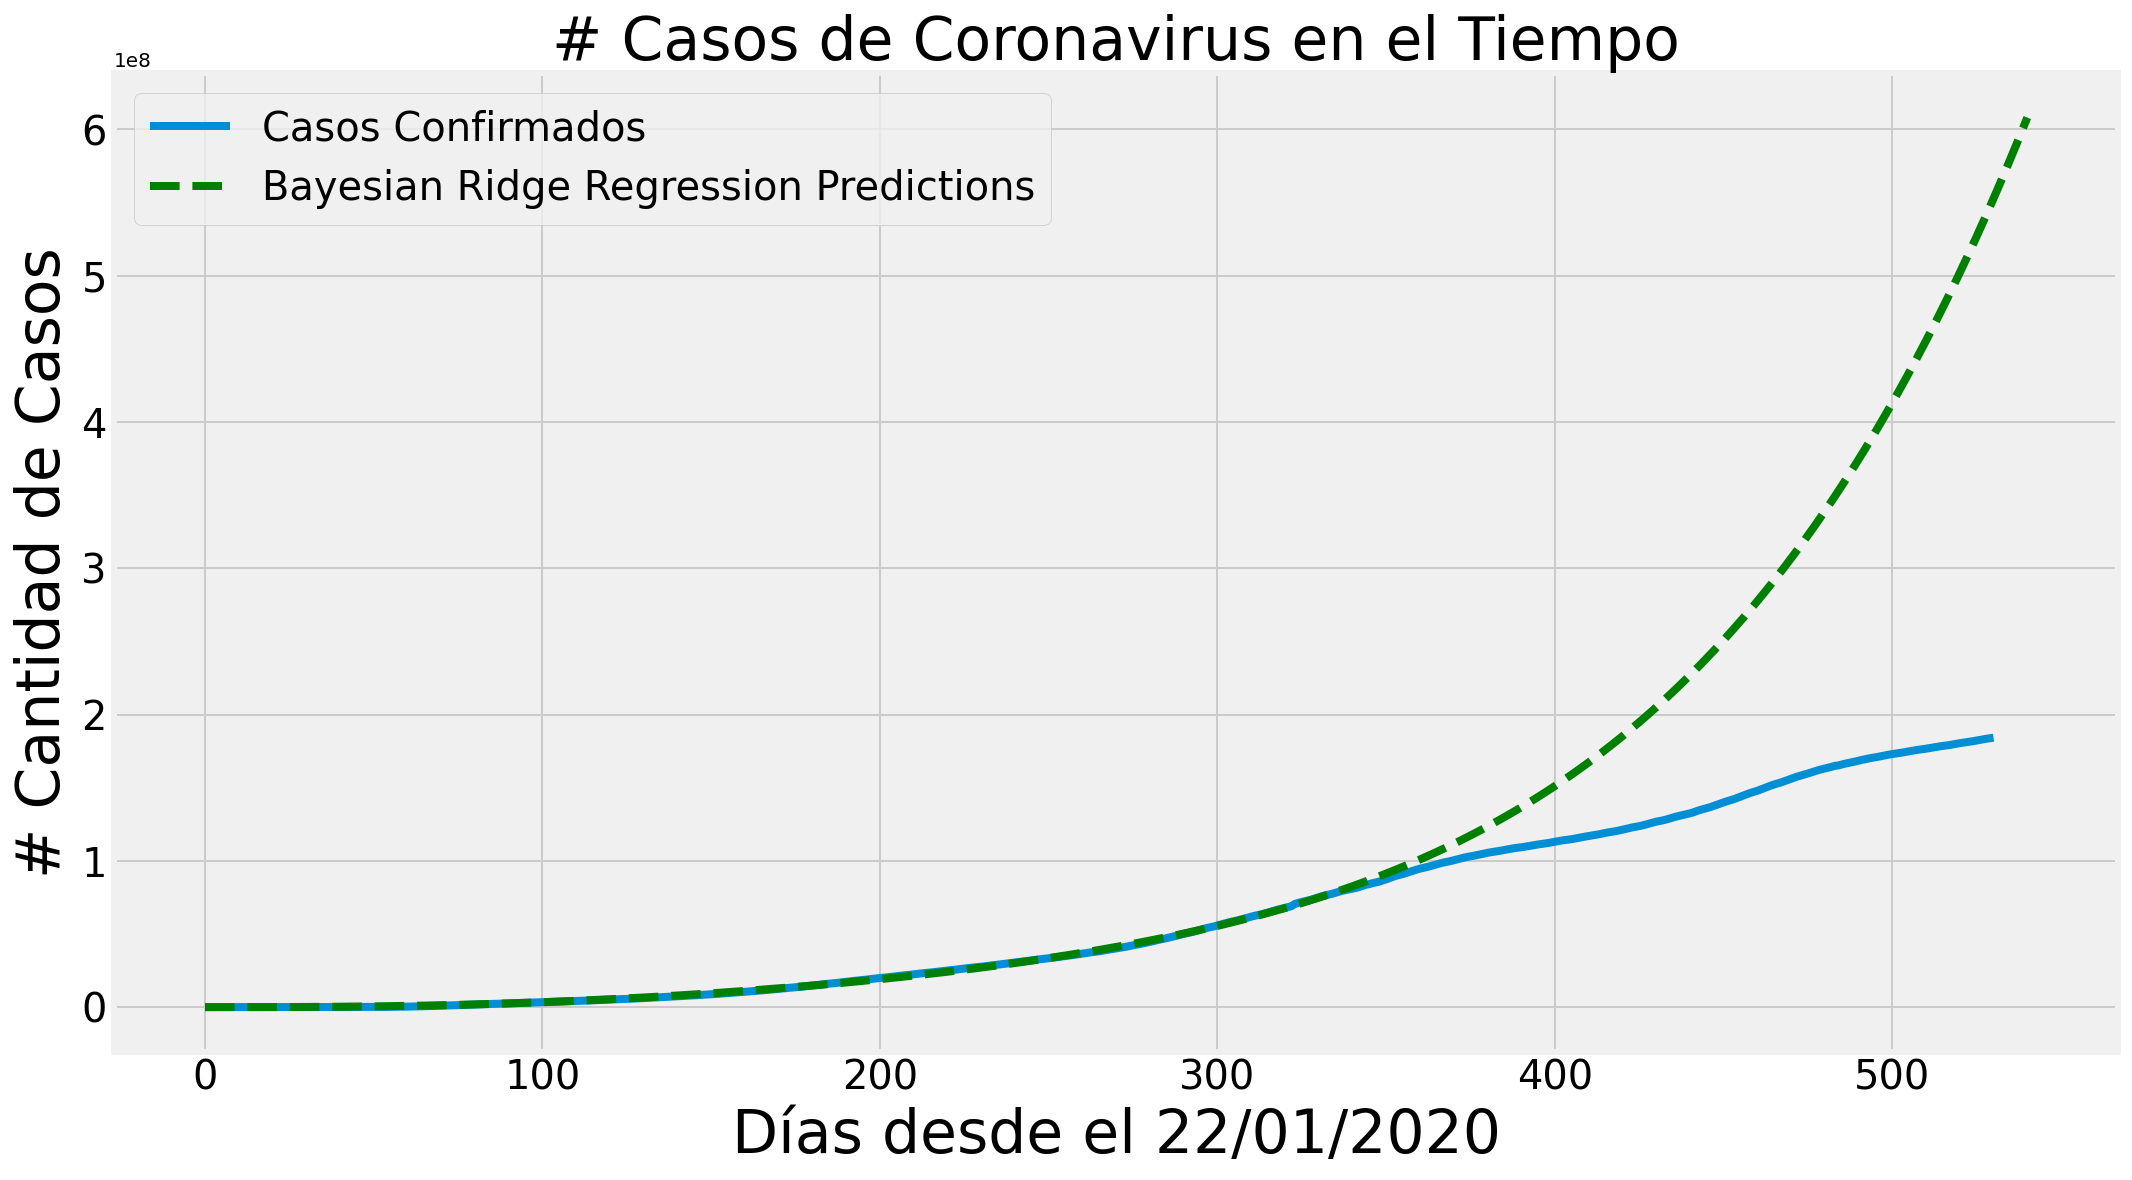

In [132]:
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Bayesian Ridge Regression Predictions', 'green')


## 5.3 Predicciones para fechas futuras

In [136]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Fecha': future_forcast_dates[-10:], 'Predicciones SVM de casos confirmados Globales': np.round(svm_pred[-10:])})
svm_df
svm_df.style.background_gradient(cmap='Reds')

In [137]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
svm_df = pd.DataFrame({'Fecha': future_forcast_dates[-10:], 'Predicciones Polynomial Regression de casos confirmados Globales': np.round(linear_pred[-10:])})
svm_df
svm_df.style.background_gradient(cmap='Reds')

In [138]:
# Future predictions using Bayesian Ridge 
svm_df = pd.DataFrame({'Fecha': future_forcast_dates[-10:], 'Predicciones Bayesian Ridge de casos confirmados Globales': np.round(bayesian_pred[-10:])})
svm_df
svm_df.style.background_gradient(cmap='Reds')


# 6. Otras visualizaciones


## 6.1 Tabla de países

In [139]:
unique_countries =  list(latest_data['Country_Region'].unique())


In [140]:
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

In [141]:
country_df = pd.DataFrame({'País': unique_countries, 'Casos Confirmados': country_confirmed_cases,
                          'Muertes': country_death_cases, 'Recoveries' : country_recovery_cases, 
                          'Casos Activos' : country_active_cases,
                          'Tasa de Mortalidad': country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Greens')

## 6.2 Data por provincias

### 6.2.1 Provincias únicas

In [142]:
unique_provinces =  list(latest_data['Province_State'].unique())


In [143]:
province_confirmed_cases = []
province_country = [] 
province_death_cases = [] 
province_recovery_cases = []
province_mortality_rate = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])


In [144]:
# number of cases per province/state/city
province_df = pd.DataFrame({'Provincia/Estado': unique_provinces, 'País': province_country, 'Casos Confirmados': province_confirmed_cases,
                          'Muertes': province_death_cases, 'Recoveries' : province_recovery_cases,
                          'Tasa de Mortalidad': province_mortality_rate})
# number of cases per country/region

province_df.style.background_gradient(cmap='Greens')

### 6.2.2 Provincias por país

In [145]:
# return the data table with province/state info for a given country
def country_table(country_name):
    states = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    state_confirmed_cases = []
    state_death_cases = [] 
    state_recovery_cases = []
    state_active = [] 
    state_incidence_rate = [] 
    state_mortality_rate = [] 

    no_cases = [] 
    for i in states:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            state_confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        states.remove(i)

    states = [k for k, v in sorted(zip(states, state_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
    for i in range(len(states)):
        state_confirmed_cases[i] = latest_data[latest_data['Province_State']==states[i]]['Confirmed'].sum()
        state_death_cases.append(latest_data[latest_data['Province_State']==states[i]]['Deaths'].sum())
        state_recovery_cases.append(latest_data[latest_data['Province_State']==states[i]]['Recovered'].sum())
        state_active.append(latest_data[latest_data['Province_State']==states[i]]['Active'].sum())
        state_incidence_rate.append(latest_data[latest_data['Province_State']==states[i]]['Incident_Rate'].sum())
        state_mortality_rate.append(state_death_cases[i]/state_confirmed_cases[i])
    state_df = pd.DataFrame({'State Name': states, 'Number of Confirmed Cases': [format(int(i), ',d') for i in state_confirmed_cases],
                              'Number of Deaths': [format(int(i), ',d') for i in state_death_cases], 'Number of Active Cases' : [format(int(i), ',d') for i in state_active], 
                             'Incidence Rate' : state_incidence_rate, 'Mortality Rate': state_mortality_rate})
    # number of cases per country/region
    return state_df

In [66]:
brazil_table = country_table('Brazil')
brazil_table.style.background_gradient(cmap='Oranges')